In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
file_path = '/kaggle/input/unswnb15/UNSW_NB15_testing-set.parquet'
df = pd.read_parquet(file_path)
df.head(5)

dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.087486   
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473373   
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4  0.449454   tcp       -   FIN     10      6     534     268  33.373825   

          sload  ...  trans_depth  response_body_len  ct_src_dport_ltm  \
0  14158.942383  ...            0                  0                 1   
1   8395.112305  ...            0                  0                 1   
2   1572.271851  ...            0                  0                 1   
3   2740.178955  ...            0                  0                 1   
4   8561.499023  ...            0                  0                 2   

   ct_dst_sport_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
0                 1             0           0                 0   
1                 1             0           0                 0   
2                 1             0           0                 0   
3                 1             1           1                 0   
4                 1             0           0                 0   

   is_sm_ips_ports  attack_cat  label  
0                0      Normal      0  
1                0      Normal      0  
2                0      Normal      0  
3                0      Normal      0  
4                0      Normal      0  

[5 rows x 36 columns]

In [5]:
print("Shape :",df.shape)
print("Fields: ",list(df.columns))
df.info()

Shape : (175341, 36)
Fields:  ['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports', 'attack_cat', 'label']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float32 
 1   proto              175341 non-null  category
 2   service            175341 non-null  category
 3   state              175341 non-null  category
 4   spkts              175341 non-null  int16   
 5   dpkts              175341 non-null  int16   
 6   sbytes             175341 non-null  int32   
 7  

In [6]:
df.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [7]:
mal_df = df[df['label'] == 1]
normal_df = df[df['label'] == 0]

print("nomal",mal_df.shape[0])
print("mal",normal_df.shape[0])

nomal 119341
mal 56000


In [8]:
mal_df.describe().T

count          mean           std   min           25%  \
dur                119341.0  1.519969e+00  7.109044e+00   0.0      0.000006   
spkts              119341.0  1.540595e+01  1.609755e+02   1.0      2.000000   
dpkts              119341.0  1.001262e+01  1.111775e+02   0.0      0.000000   
sbytes             119341.0  1.106866e+04  2.116586e+05  60.0    114.000000   
dbytes             119341.0  7.364456e+03  1.447241e+05   0.0      0.000000   
rate               119341.0  1.336997e+05  1.828434e+05   0.0     34.078548   
sload              119341.0  9.704916e+07  1.990572e+08   0.0  13776.249023   
dload              119341.0  1.813877e+04  1.087292e+05   0.0      0.000000   
sloss              119341.0  4.924058e+00  7.982089e+01   0.0      0.000000   
dloss              119341.0  3.527731e+00  5.398219e+01   0.0      0.000000   
sinpkt             119341.0  1.122896e+02  1.110328e+03   0.0      0.006000   
dinpkt             119341.0  7.274046e+01  5.801230e+02   0.0      0.000000   
sjit               119341.0  4.758506e+03  4.220686e+04   0.0      0.000000   
djit               119341.0  4.350220e+02  2.460084e+03   0.0      0.000000   
swin               119341.0  8.723218e+01  1.209747e+02   0.0      0.000000   
stcpb              119341.0  7.325100e+08  1.249863e+09   0.0      0.000000   
dtcpb              119341.0  7.366857e+08  1.252577e+09   0.0      0.000000   
dwin               119341.0  8.723218e+01  1.209747e+02   0.0      0.000000   
tcprtt             119341.0  4.583042e-02  7.395225e-02   0.0      0.000000   
synack             119341.0  2.275364e-02  3.922109e-02   0.0      0.000000   
ackdat             119341.0  2.307678e-02  3.776130e-02   0.0      0.000000   
smean              119341.0  1.352379e+02  2.121887e+02  38.0     57.000000   
dmean              119341.0  6.369069e+01  1.932005e+02   0.0      0.000000   
trans_depth        119341.0  1.117303e-01  9.196211e-01   0.0      0.000000   
response_body_len  119341.0  1.351079e+03  5.850524e+04   0.0      0.000000   
ct_src_dport_ltm   119341.0  7.067998e+00  9.097151e+00   1.0      1.000000   
ct_dst_sport_ltm   119341.0  5.621471e+00  6.401592e+00   1.0      1.000000   
is_ftp_login       119341.0  1.399351e-02  1.243933e-01   0.0      0.000000   
ct_ftp_cmd         119341.0  1.399351e-02  1.243933e-01   0.0      0.000000   
ct_flw_http_mthd   119341.0  1.406558e-01  7.790137e-01   0.0      0.000000   
is_sm_ips_ports    119341.0  0.000000e+00  0.000000e+00   0.0      0.000000   
label              119341.0  1.000000e+00  0.000000e+00   1.0      1.000000   

                            50%           75%           max  
dur                9.000000e-06  6.796990e-01  5.999905e+01  
spkts              2.000000e+00  1.000000e+01  9.616000e+03  
dpkts              0.000000e+00  8.000000e+00  1.097400e+04  
sbytes             2.000000e+02  8.480000e+02  1.296523e+07  
dbytes             0.000000e+00  3.540000e+02  1.465555e+07  
rate               1.111111e+05  1.666667e+05  1.000000e+06  
sload              5.066666e+07  1.000000e+08  5.988000e+09  
dload              0.000000e+00  3.306859e+03  2.447663e+06  
sloss              0.000000e+00  2.000000e+00  4.803000e+03  
dloss              0.000000e+00  1.000000e+00  5.484000e+03  
sinpkt             9.000000e-03  5.438744e+01  8.437149e+04  
dinpkt             0.000000e+00  5.588238e+01  1.965867e+04  
sjit               0.000000e+00  2.618311e+03  1.181164e+06  
djit               0.000000e+00  1.114793e+02  1.882909e+05  
swin               0.000000e+00  2.550000e+02  2.550000e+02  
stcpb              0.000000e+00  1.145239e+09  4.294959e+09  
dtcpb              0.000000e+00  1.161381e+09  4.294776e+09  
dwin               0.000000e+00  2.550000e+02  2.550000e+02  
tcprtt             0.000000e+00  8.974200e-02  1.490702e+00  
synack             0.000000e+00  4.168300e-02  5.131250e-01  
ackdat             0.000000e+00  4.693900e-02  1.424061e+00  
smean              7.600000e+01  1.000000e+02  1.5

In [9]:
normal_df.describe().T

count          mean           std   min           25%  \
dur                56000.0  1.017177e+00  4.859242e+00   0.0      0.001718   
spkts              56000.0  3.072548e+01  5.734414e+01   1.0      4.000000   
dpkts              56000.0  3.805770e+01  1.057733e+02   0.0      2.000000   
sbytes             56000.0  4.105703e+03  1.134805e+04  28.0    424.000000   
dbytes             56000.0  3.104946e+04  1.399913e+05   0.0    178.000000   
rate               56000.0  1.379931e+04  6.803139e+04   0.0     30.730738   
sload              56000.0  2.317070e+07  1.514274e+08   0.0  12352.620117   
dload              56000.0  2.062949e+06  3.935217e+06   0.0   4790.794556   
sloss              56000.0  5.014679e+00  7.948631e+00   0.0      0.000000   
dloss              56000.0  1.423693e+01  4.917992e+01   0.0      0.000000   
sinpkt             56000.0  2.847882e+03  1.251028e+04   0.0      0.320380   
dinpkt             56000.0  1.211967e+02  1.527094e+03   0.0      0.008000   
sjit               56000.0  5.440296e+03  5.034080e+04   0.0      0.015678   
djit               56000.0  9.652151e+02  6.208860e+03   0.0      0.000000   
swin               56000.0  1.781126e+02  1.170159e+02   0.0      0.000000   
stcpb              56000.0  1.473765e+09  1.431070e+09   0.0      0.000000   
dtcpb              56000.0  1.463697e+09  1.427233e+09   0.0      0.000000   
dwin               56000.0  1.742184e+02  1.186303e+02   0.0      0.000000   
tcprtt             56000.0  3.194473e-02  8.905469e-02   0.0      0.000000   
synack             56000.0  1.732687e-02  5.098323e-02   0.0      0.000000   
ackdat             56000.0  1.461787e-02  4.527649e-02   0.0      0.000000   
smean              56000.0  1.399780e+02  1.876307e+02  28.0     59.000000   
dmean              56000.0  2.530674e+02  3.240004e+02   0.0     53.000000   
trans_depth        56000.0  9.373214e-02  2.956557e-01   0.0      0.000000   
response_body_len  56000.0  3.834699e+03  4.361348e+04   0.0      0.000000   
ct_src_dport_ltm   56000.0  1.793804e+00  2.731102e+00   1.0      1.000000   
ct_dst_sport_ltm   56000.0  1.190304e+00  2.009393e+00   1.0      1.000000   
is_ftp_login       56000.0  1.698214e-02  1.294816e-01   0.0      0.000000   
ct_ftp_cmd         56000.0  1.698214e-02  1.294816e-01   0.0      0.000000   
ct_flw_http_mthd   56000.0  1.168929e-01  4.958590e-01   0.0      0.000000   
is_sm_ips_ports    56000.0  4.932143e-02  2.165402e-01   0.0      0.000000   
label              56000.0  0.000000e+00  0.000000e+00   0.0      0.000000   

                            50%           75%           max  
dur                3.860250e-02  6.398302e-01  5.999999e+01  
spkts              1.200000e+01  4.000000e+01  6.560000e+02  
dpkts              1.000000e+01  4.000000e+01  1.716000e+03  
sbytes             1.470000e+03  3.401500e+03  3.387180e+05  
dbytes             1.112000e+03  1.016800e+04  2.249492e+06  
rate               1.382257e+03  3.177693e+03  1.000000e+06  
sload              4.313277e+05  8.273671e+05  5.344000e+09  
dload              3.361206e+05  1.313494e+06  2.242273e+07  
sloss              3.000000e+00  7.000000e+00  1.440000e+02  
dloss              2.000000e+00  8.000000e+00  8.560000e+02  
sinpkt             1.430907e+00  5.747883e+01  6.000992e+04  
dinpkt             9.105820e-01  3.349389e+01  5.671682e+04  
sjit               5.442267e+01  2.292889e+03  1.460480e+06  
djit               1.922622e+01  1.230509e+02  2.893883e+05  
swin               2.550000e+02  2.550000e+02  2.550000e+02  
stcpb              1.180207e+09  2.736822e+09  4.294814e+09  
dtcpb              1.152046e+09  2.724027e+09  4.294882e+09  
dwin               2.550000e+02  2.550000e+02  2.550000e+02  
tcprtt             6.450000e-04  7.610000e-04  2.518893e+00  
synack             5.150000e-04  6.080000e-04  2.100352e+00  
ackdat             1.250000e-04  1.490000e-04  1.520884e+00  
smean              7.300000e+01  1.300000e+02  1.499000e+03  
dmean              8

In [10]:
def standardization(dataframe,col_name):
    mean_val = dataframe[col_name].mean()
    std_val = dataframe[col_name].std()
    dataframe[col_name]=((dataframe[col_name]-mean_val)/std_val)
#     return dataframe

def show_scatter_plot(dataframe,col_name):
    mdf = dataframe[dataframe['label'] == 1]
    ndf = dataframe[dataframe['label'] == 0]
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Scatter plot for mal_df
    axs[0].scatter(range(len(mdf)), mdf[col_name], alpha=0.5, color='red', label='Malicious')
    axs[0].set_title('Scatter Plot of Malicious')
    axs[0].set_xlabel('Index')
    axs[0].set_ylabel(col_name)
    axs[0].legend()

    # Scatter plot for normal_df
    axs[1].scatter(range(len(ndf)), ndf[col_name], alpha=0.5, color='blue', label='Normal')
    axs[1].set_title('Scatter Plot of Non-Malicious')
    axs[1].set_xlabel('Index')
    axs[1].set_ylabel(col_name)
    axs[1].legend()

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()
    plt.show()

def show_distribution(dataframe,col_name,bins=50):
    fig = dataframe[col_name].hist(bins=bins)
    fig.set_title("Distribution")
    fig.set_xlabel(col_name)
    fig.set_ylabel("Count")
    
def remove_outlier(data_frame,column_name,verbose=1):
    l = data_frame[column_name].min()
    r = data_frame[column_name].max()
    q1 = data_frame[column_name].quantile(0.25)
    q3 = data_frame[column_name].quantile(0.75)
    iqr = q3 -q1
    lb = q1-3*iqr
    ub = q3+3*iqr
    
    num_outliers = data_frame[(data_frame[column_name]<lb) | (data_frame[column_name]>ub)].shape[0]
    
    data_frame.loc[data_frame[column_name] > ub , column_name] = ub
    data_frame.loc[data_frame[column_name] < lb , column_name] = lb
    
    if verbose == 1: 
        print("Min Value= ",l)
        print("Lower Bound = ",lb)
        print("Q1 = ",q1)
        print("Q2 = ",q3)
        print("Upper Bound = ", ub)
        print("Max Value = ",r)
        print("Number of Outliers = ",num_outliers)
#     return data_frame    

<h1>dur</h1>

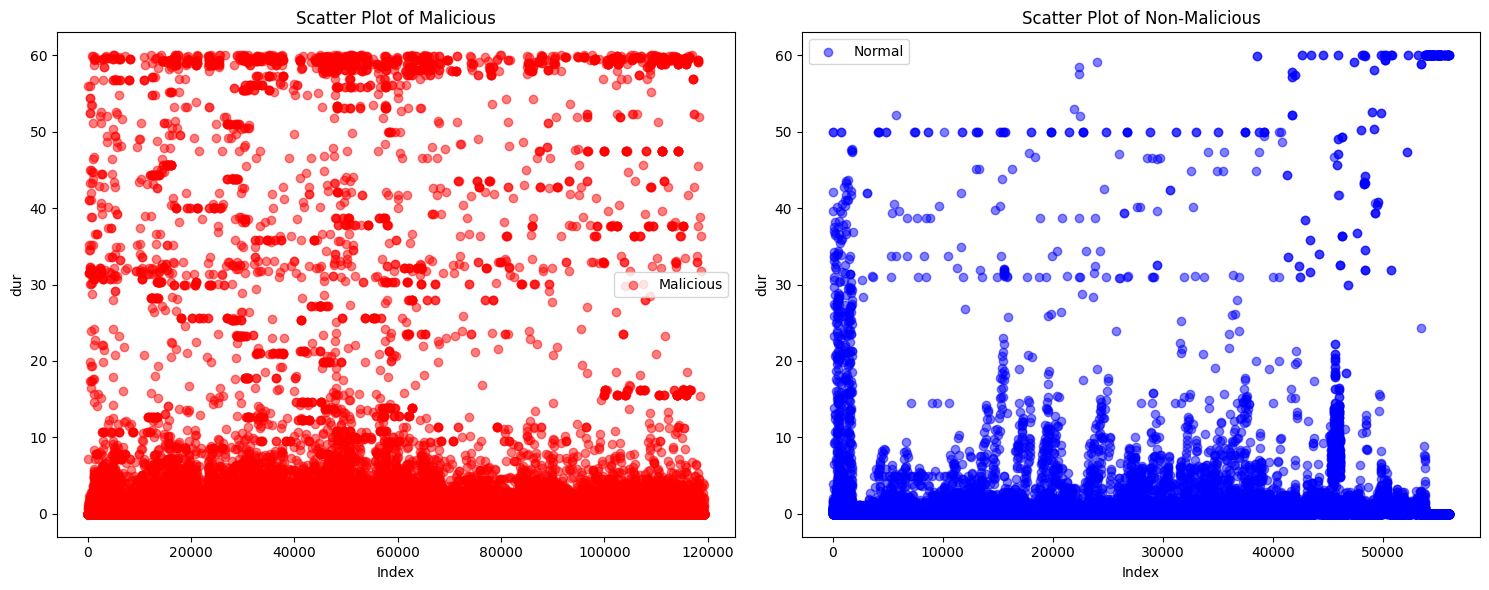

In [11]:
show_scatter_plot(df,'dur')

In [12]:
remove_outlier(df,'dur')

Min Value=  0.0
Lower Bound =  -2.0041750150376174
Q1 =  7.999999979801942e-06
Q2 =  0.6680690050125122
Upper Bound =  2.6722520200501094
Max Value =  59.99999
Number of Outliers =  9889


<h1><b>spkts</b></h1>

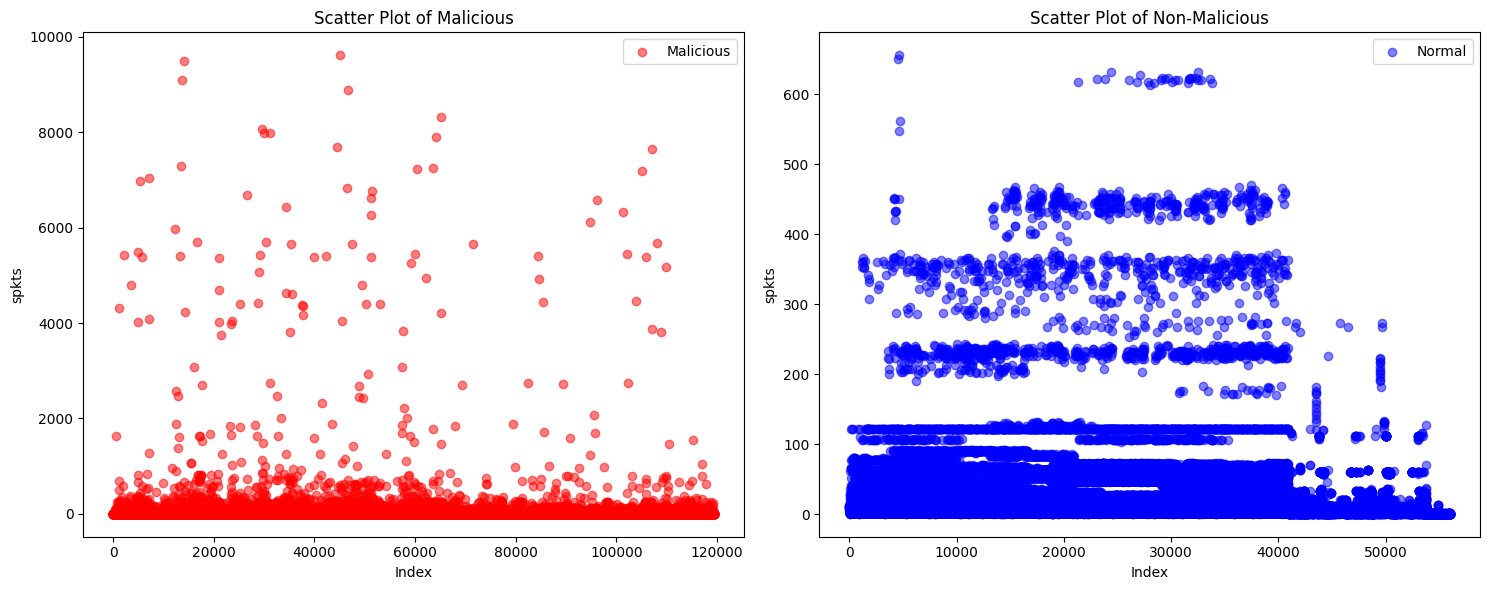

In [13]:
col = 'spkts'
show_scatter_plot(df,col)

In [14]:
print(mal_df[col].max())
print(normal_df[col].max())

9616
656


In [15]:
col = 'spkts'
mx_val = normal_df[col].max()
df.loc[df[col] > mx_val , col] = (mx_val*1.2)

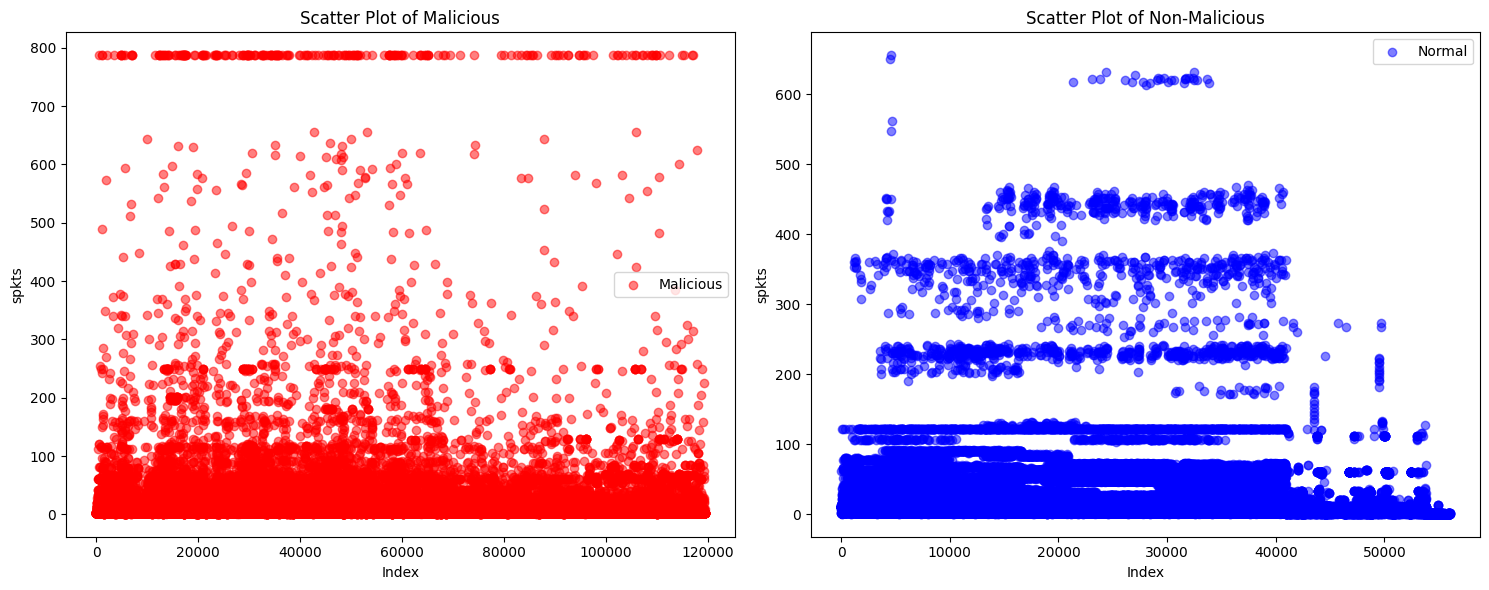

In [16]:
show_scatter_plot(df,col)

<h1><b>dpkts</b></h1>

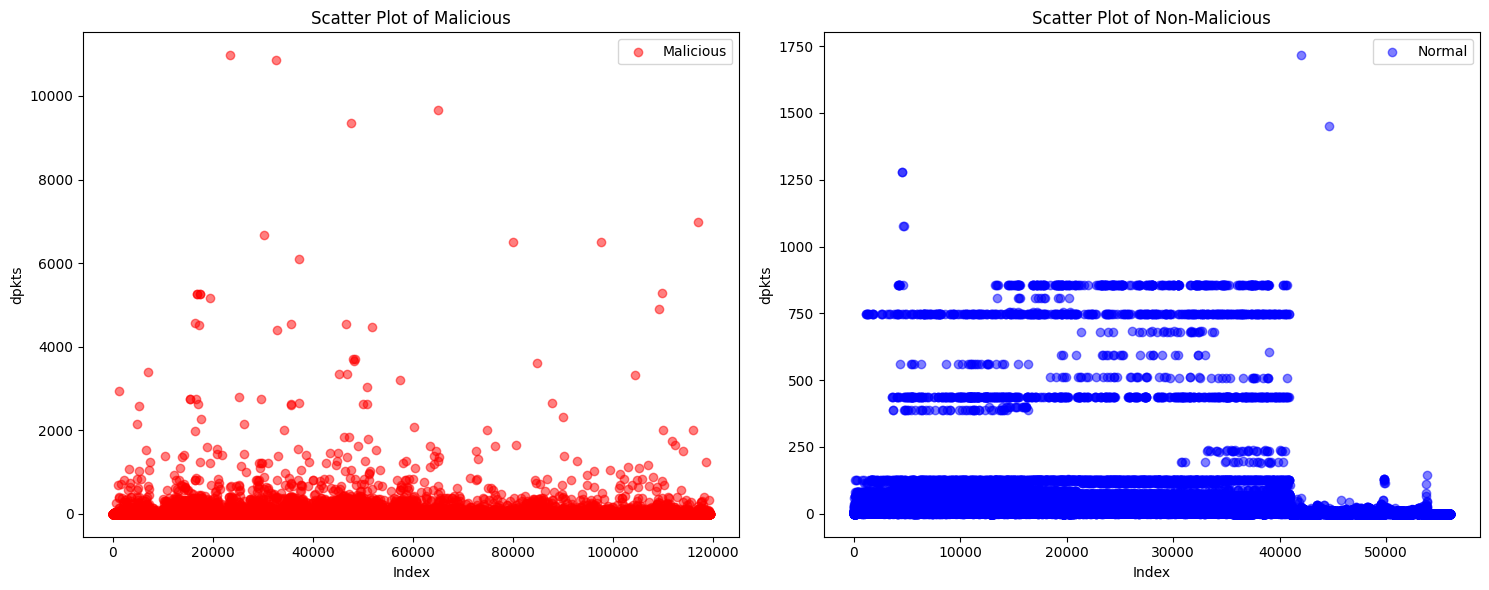

In [17]:
col = 'dpkts'
show_scatter_plot(df,col)

<h1><b>sbytes</b><h1>

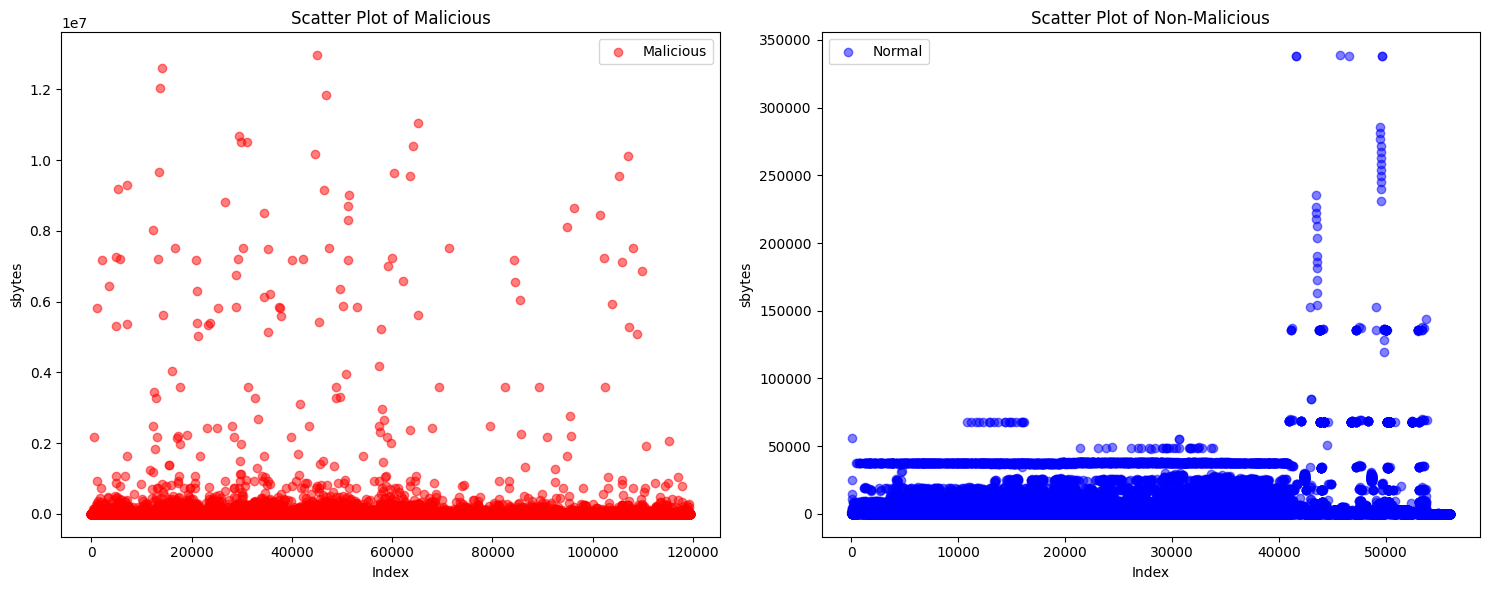

In [18]:
col = 'sbytes'
show_scatter_plot(df,col)

<h1><b>dbytes</b></h1>

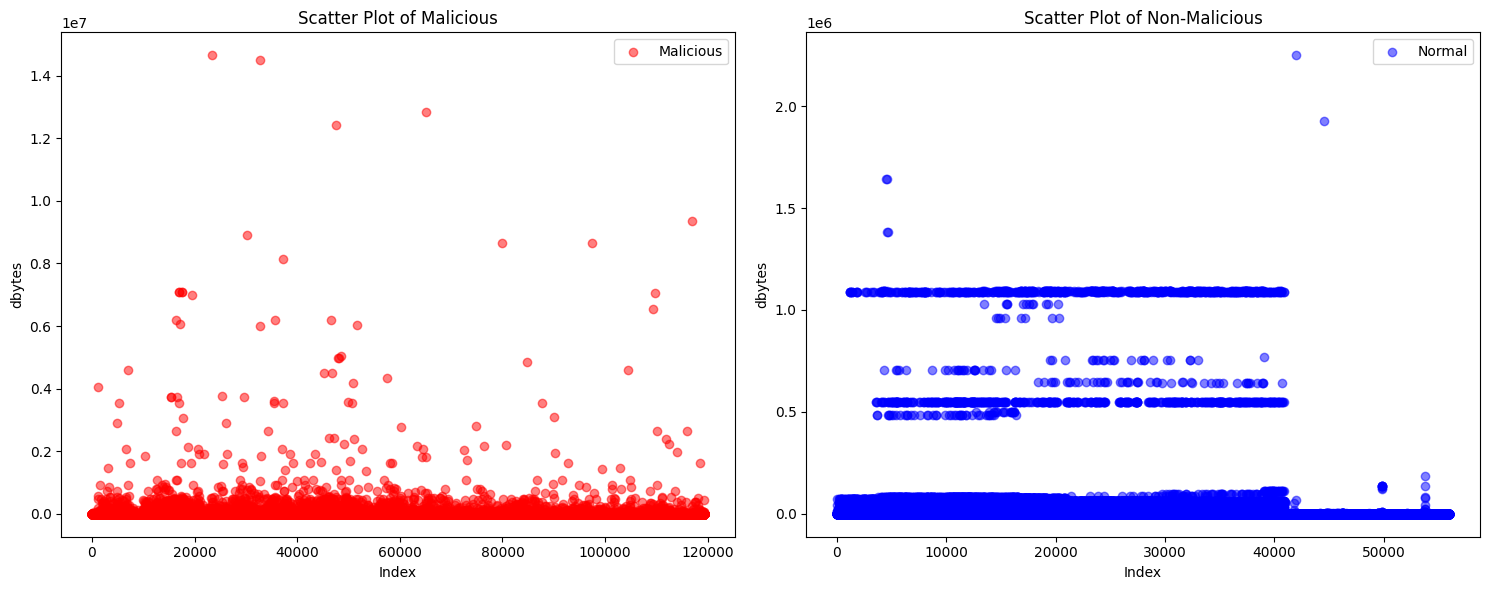

In [19]:
col = "dbytes"
show_scatter_plot(df,col)

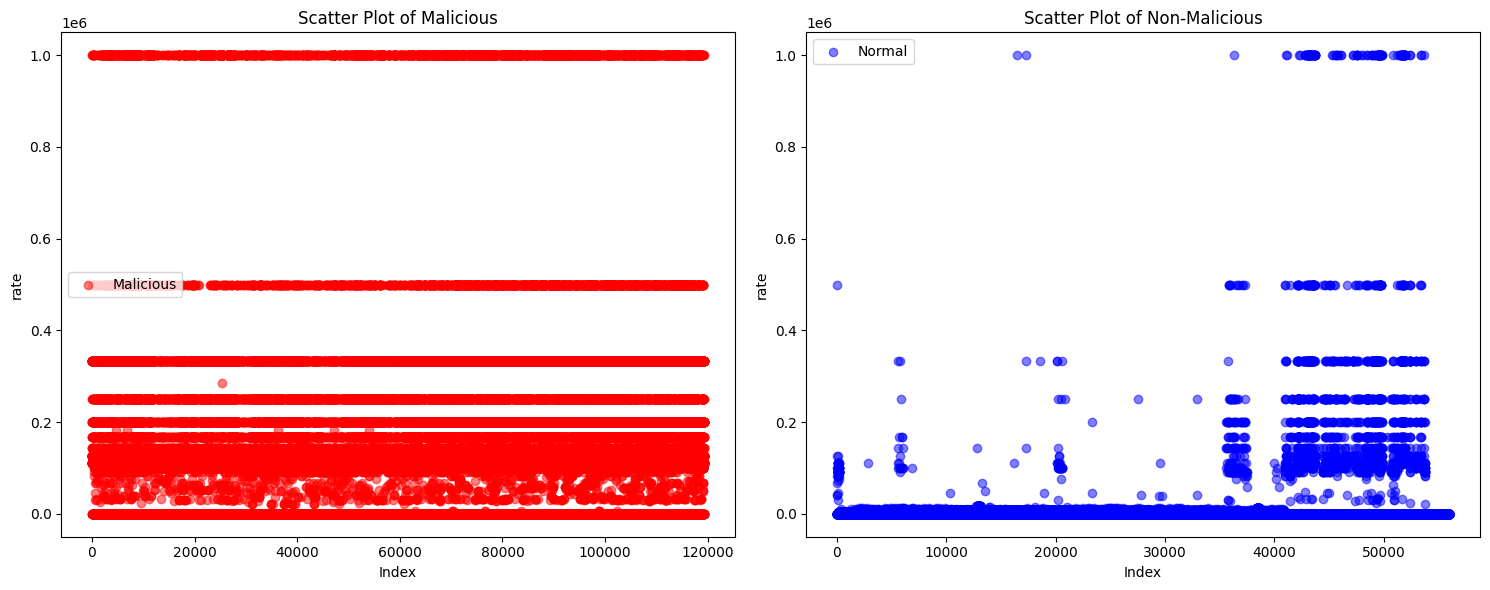

In [20]:
col = "rate"
show_scatter_plot(df,col)

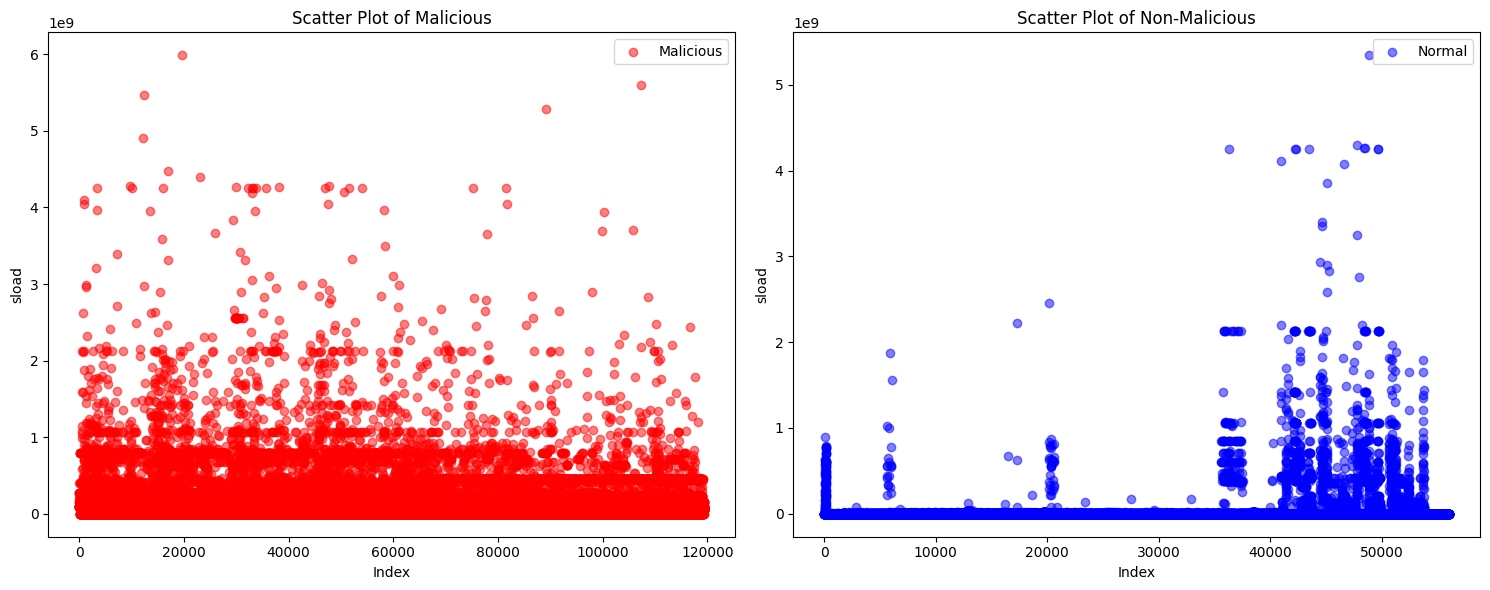

In [21]:
col = "sload"
show_scatter_plot(df,col)

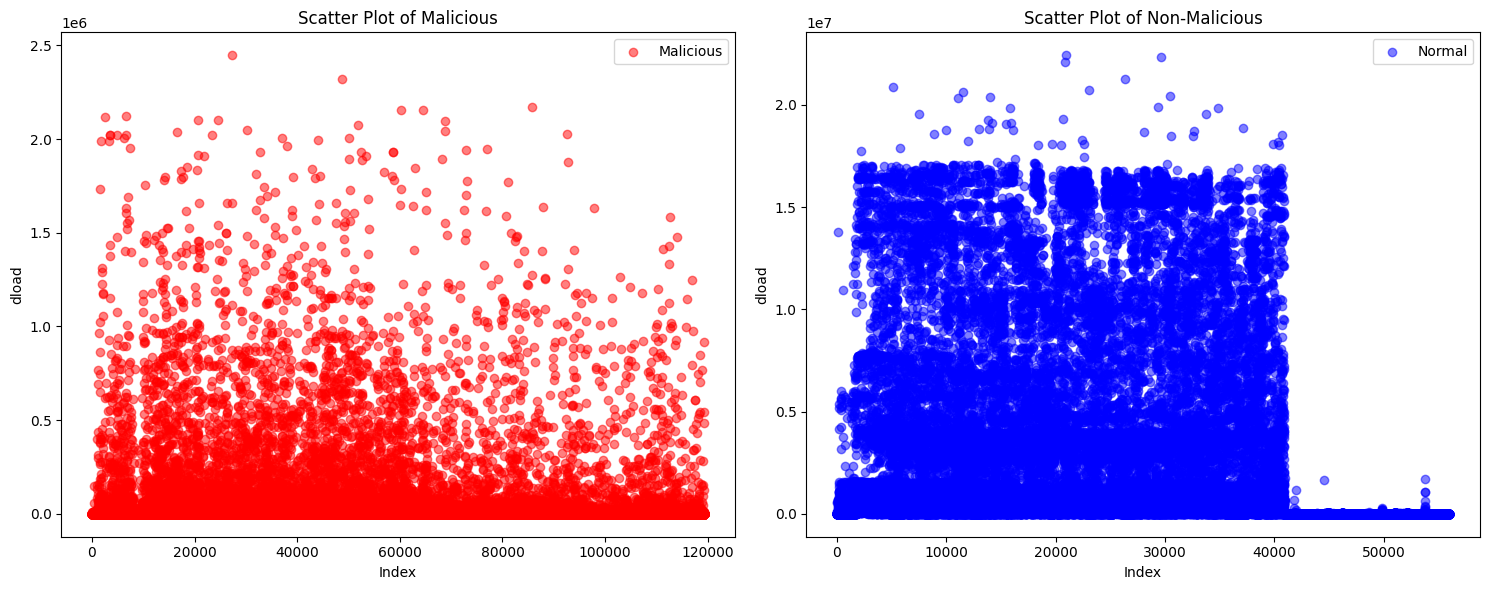

In [22]:
col = "dload"
show_scatter_plot(df,col)

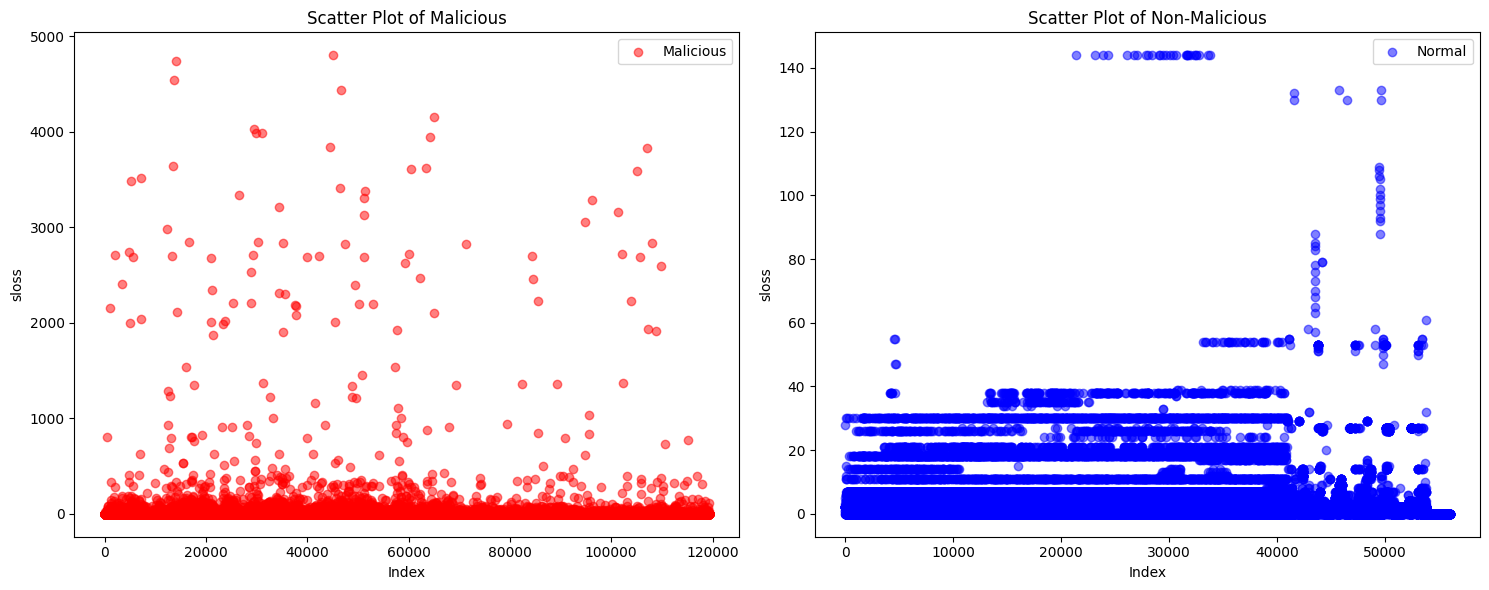

In [23]:
col = "sloss"
show_scatter_plot(df,col)

In [24]:
col = "sloss"
mx_val = normal_df[col].max()
df.loc[df[col] > mx_val , col] = (mx_val*1.2)

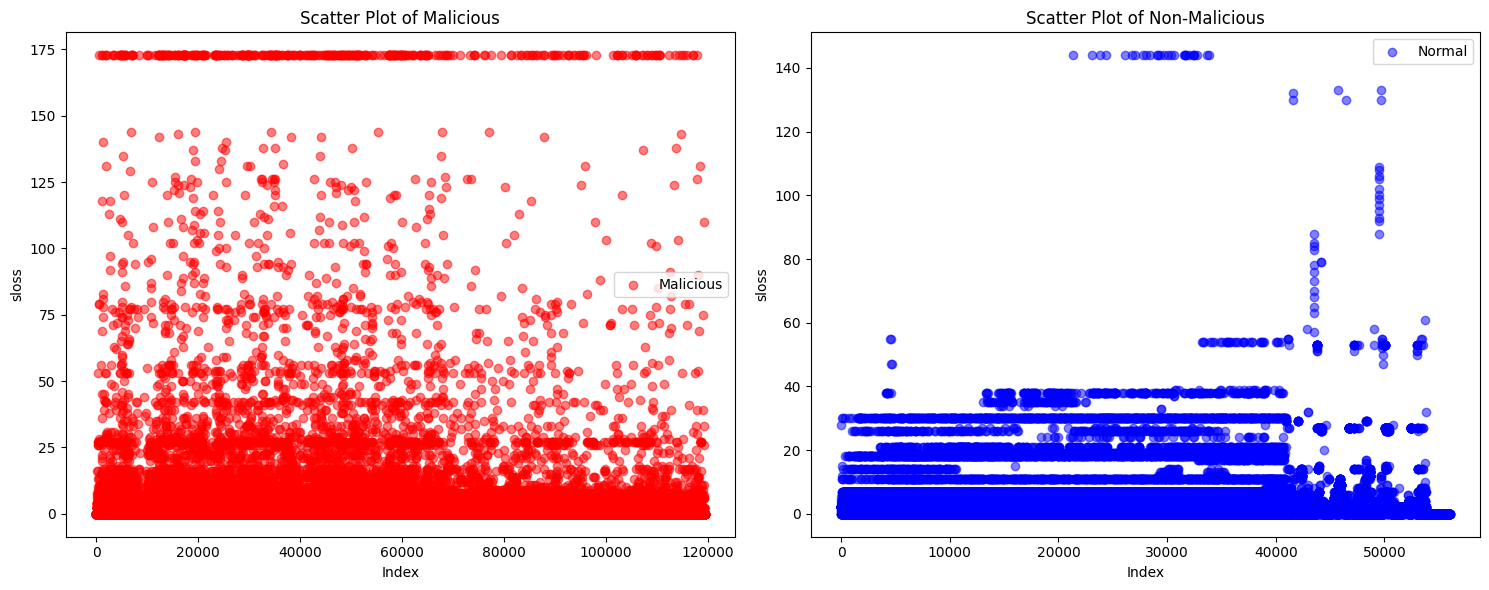

In [25]:
show_scatter_plot(df,col)

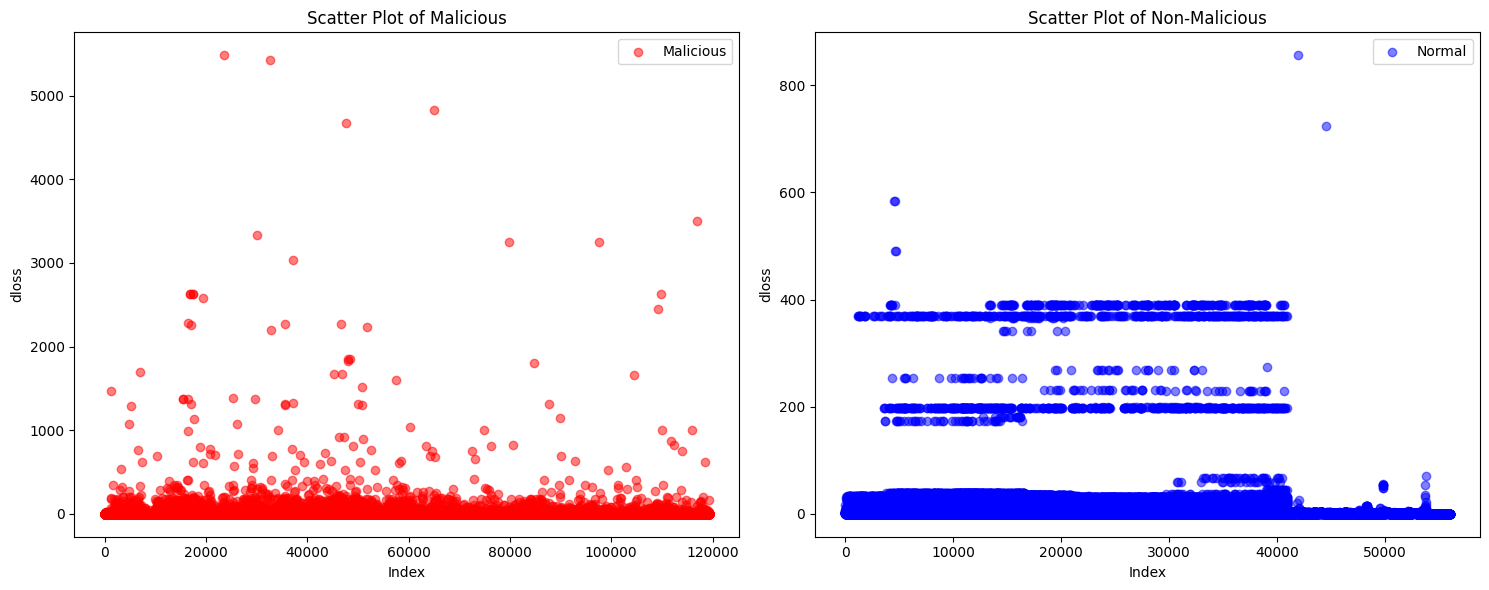

In [26]:
col = "dloss"
show_scatter_plot(df,col)

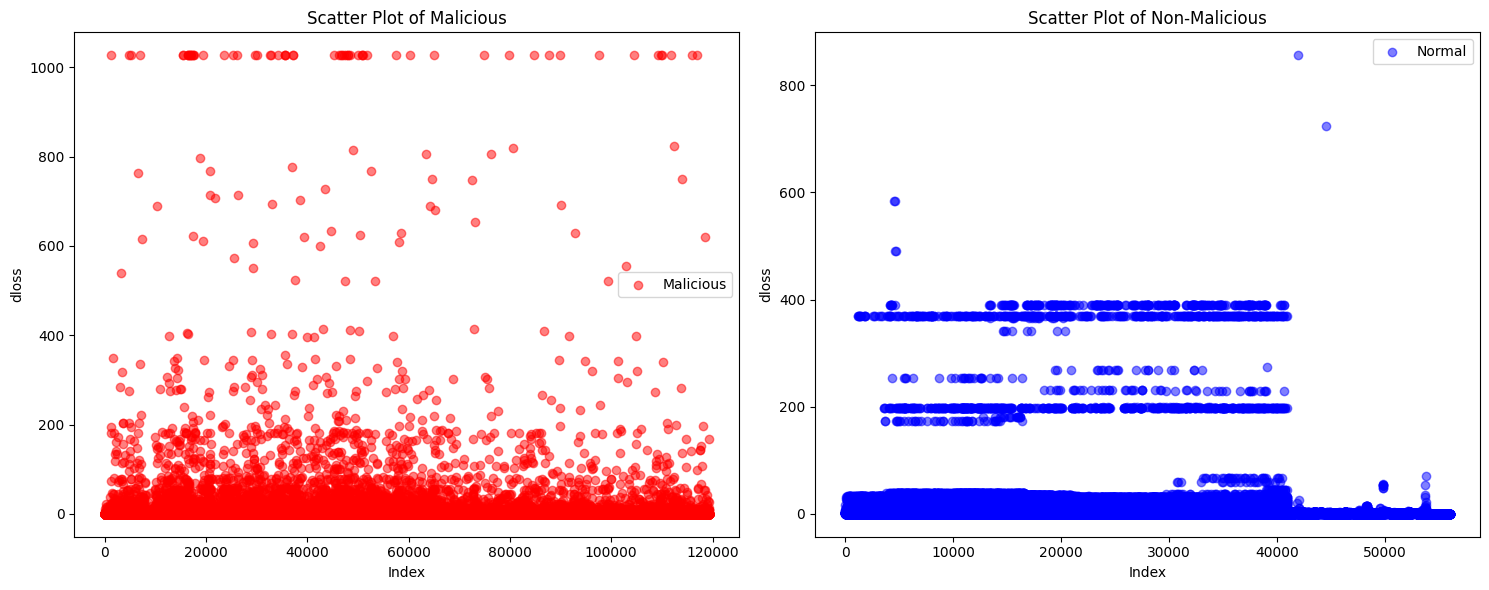

In [27]:
col = "dloss"
mx_val = normal_df[col].max()
df.loc[df[col] > mx_val , col] = (mx_val*1.2)
show_scatter_plot(df,col)

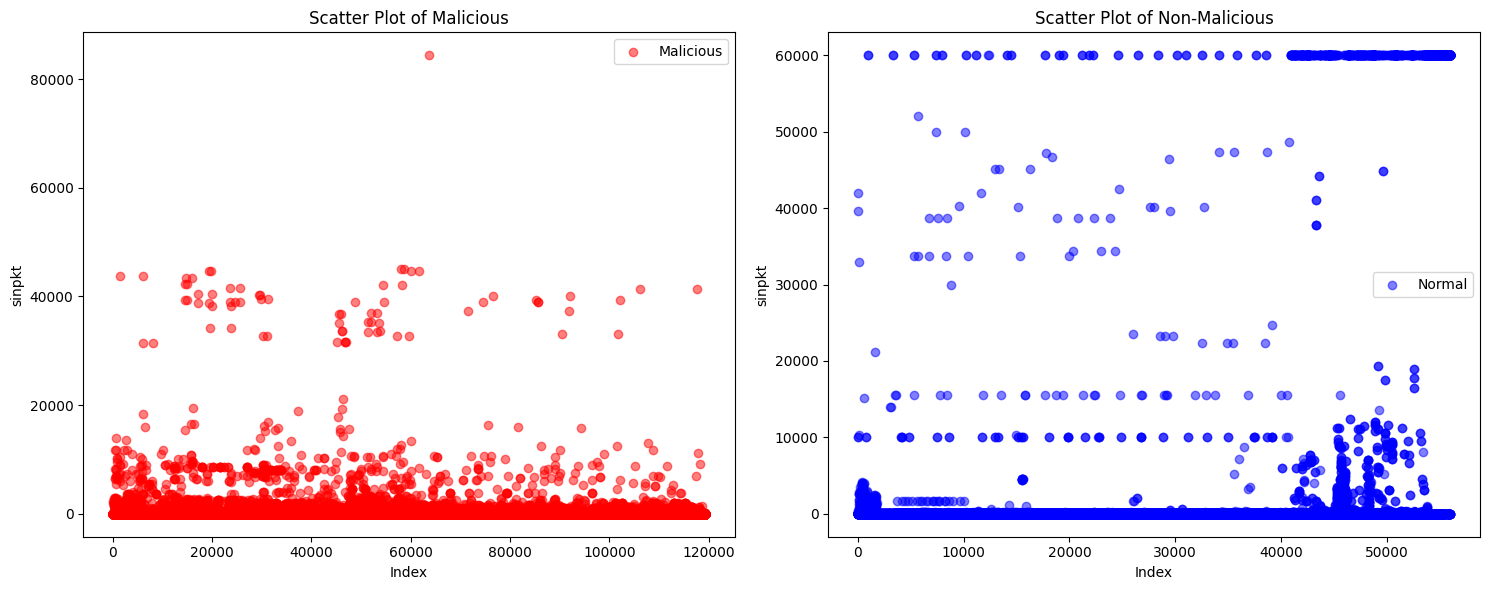

In [28]:
col = "sinpkt"
show_scatter_plot(df,col)

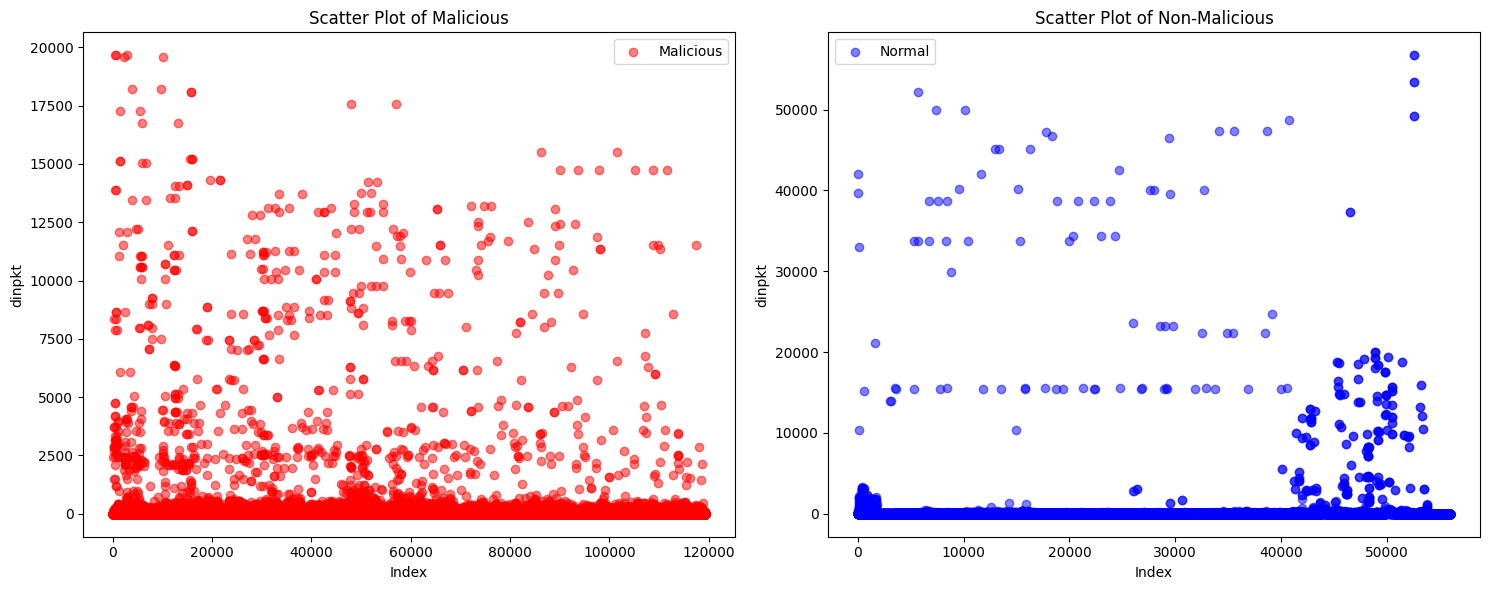

In [29]:
col = "dinpkt"
show_scatter_plot(df,col)

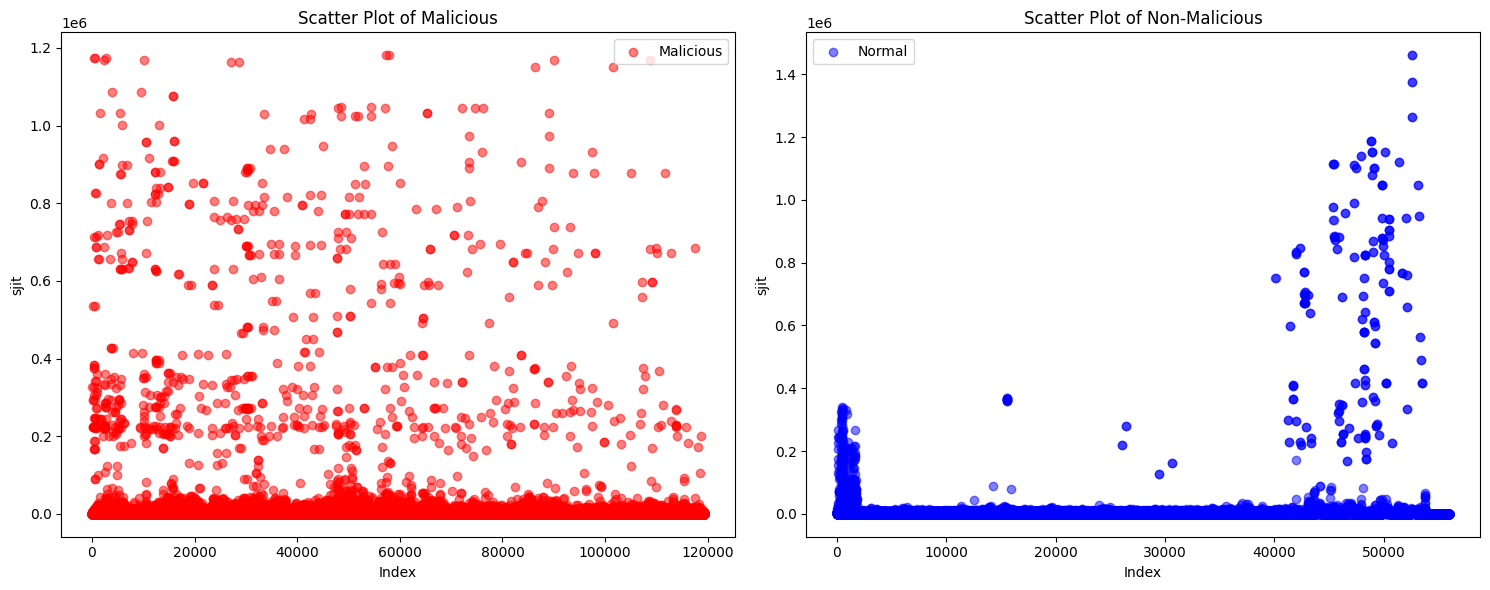

In [30]:
col = "sjit"
show_scatter_plot(df,col)

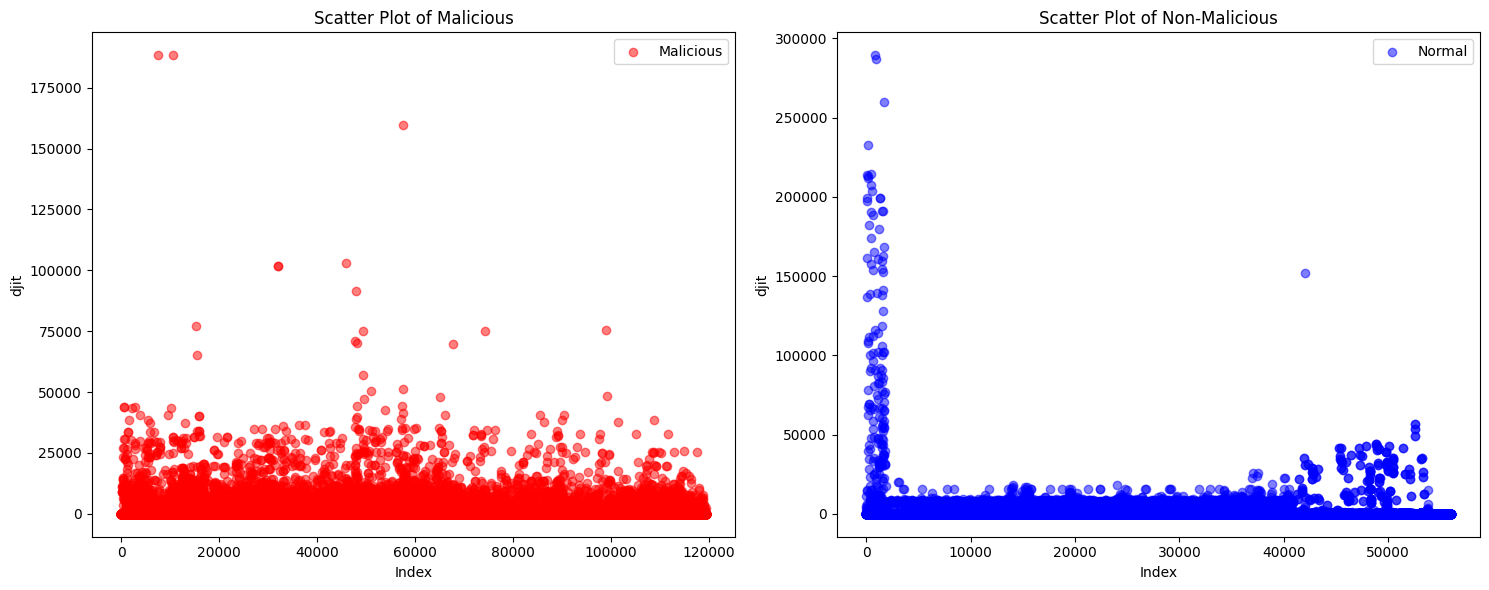

In [31]:
col = "djit"
show_scatter_plot(df,col)

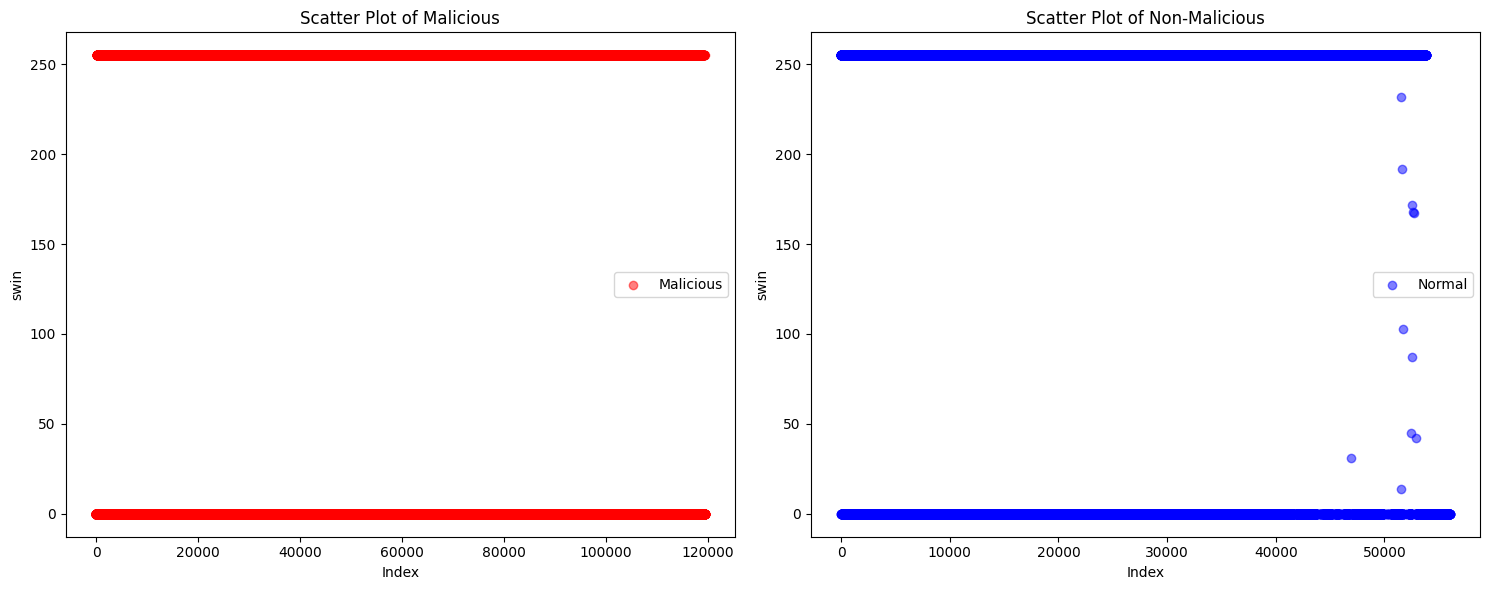

In [32]:
col = 'swin'
show_scatter_plot(df,col)

In [33]:
col = 'swin'
df = df.drop(col, axis=1)

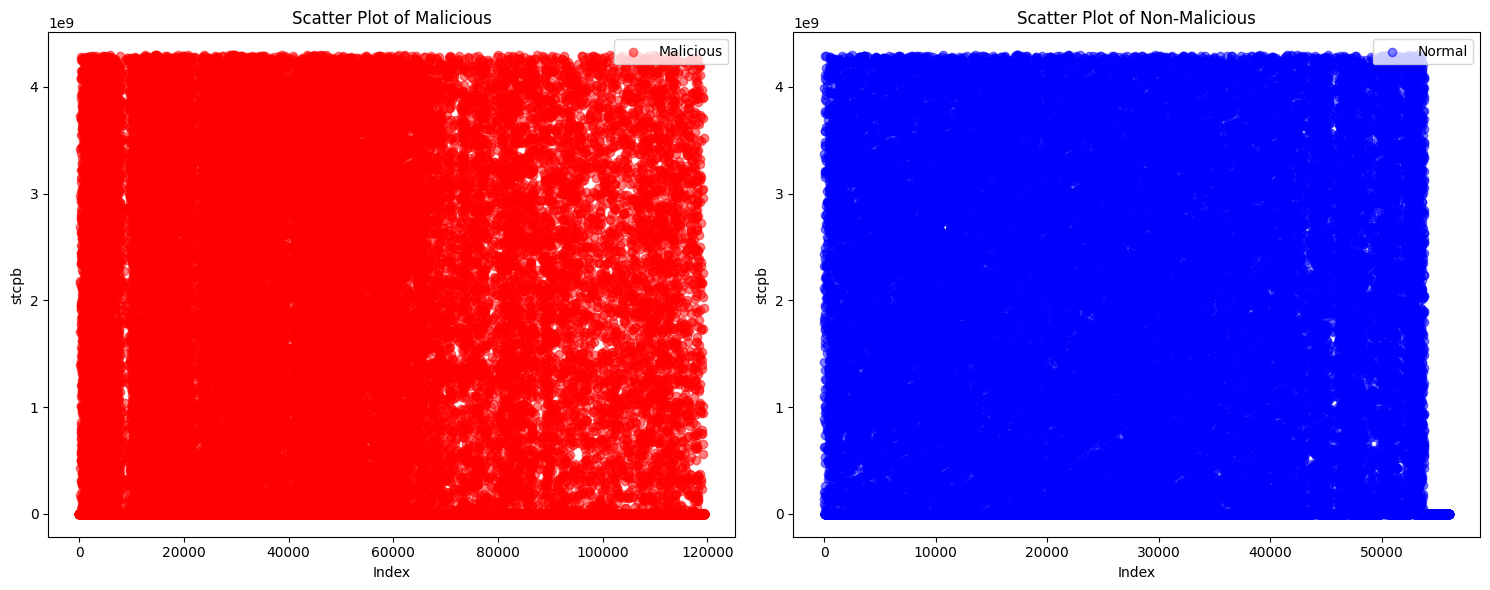

In [34]:
col = 'stcpb'
show_scatter_plot(df,col)# 'dtcpb', 'dwin'

In [35]:
col = 'stcpb'
df = df.drop(col, axis=1)

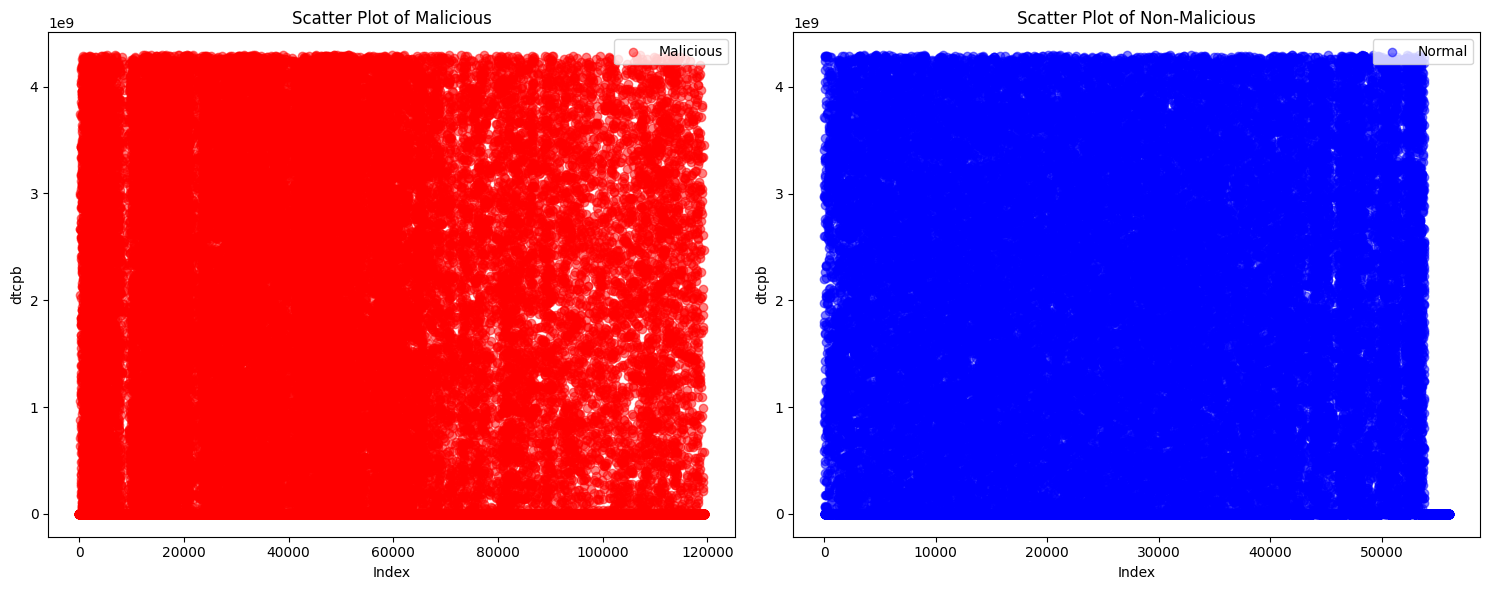

In [36]:
col = 'dtcpb'
show_scatter_plot(df,col) #'dwin'

In [37]:
df = df.drop(col, axis=1)

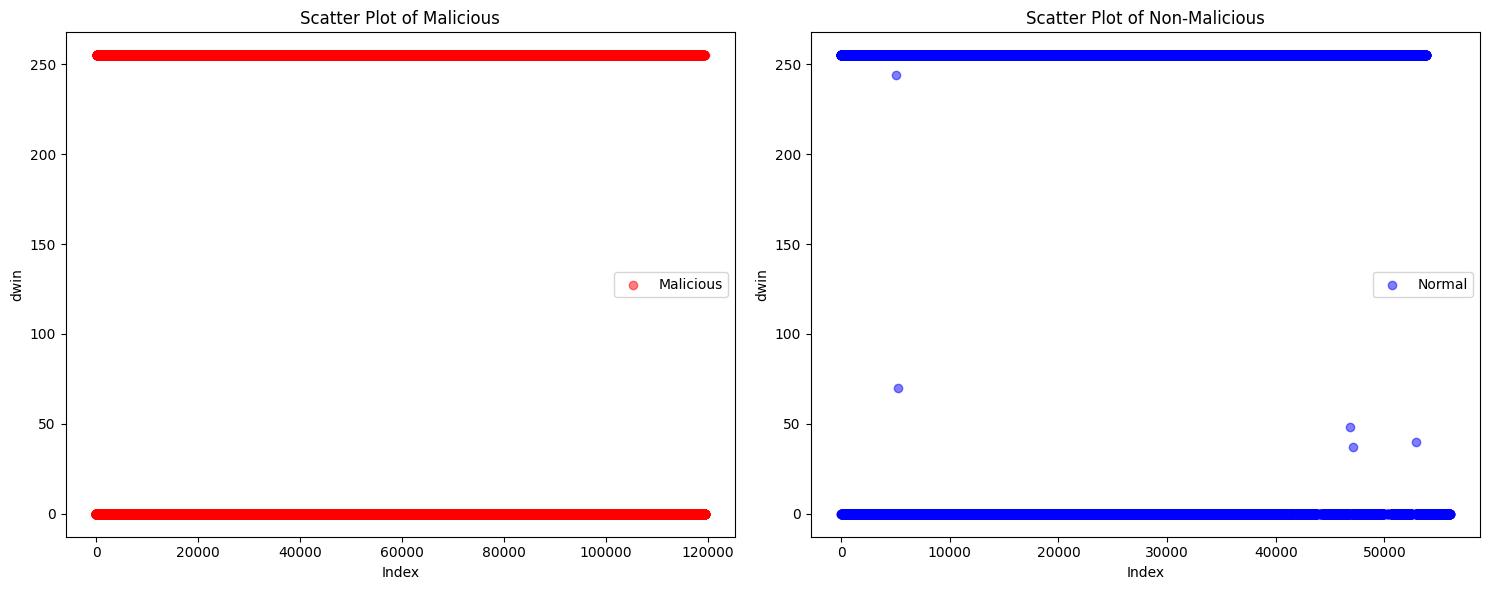

In [38]:
col = 'dwin'
show_scatter_plot(df,col)

In [39]:
df = df.drop(col, axis=1)

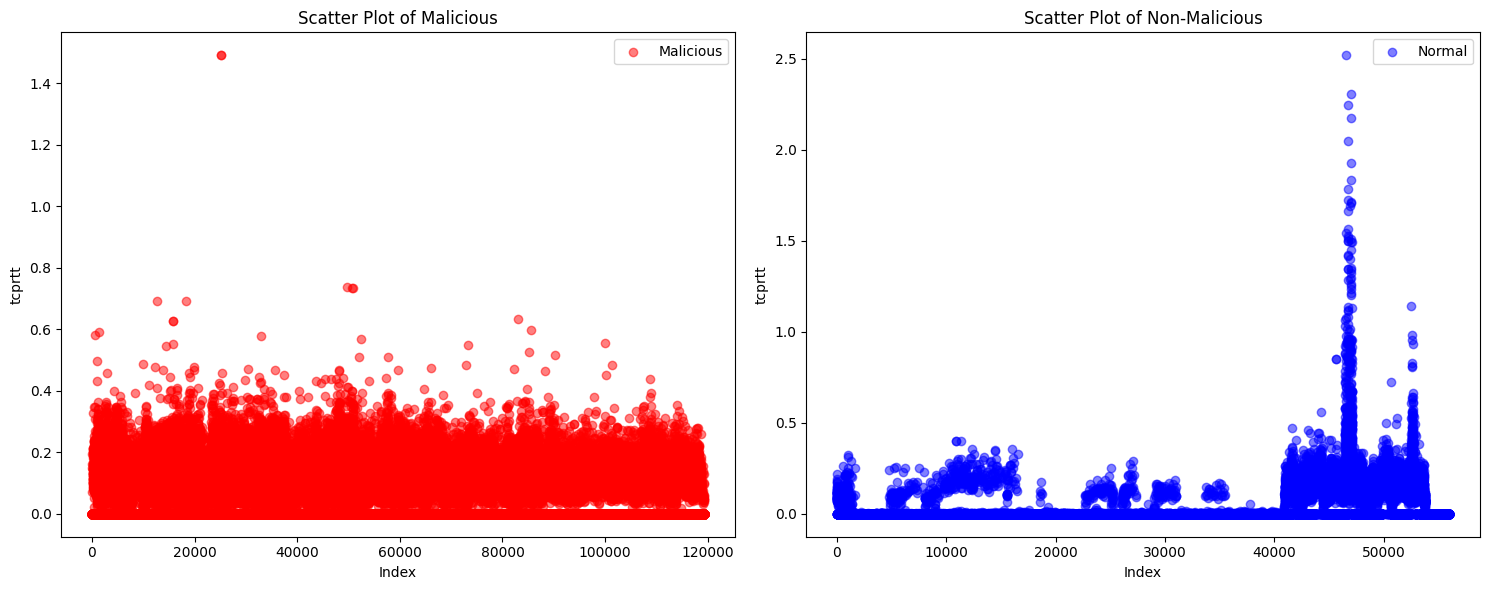

In [40]:
col = 'tcprtt'
show_scatter_plot(df,col)#'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',

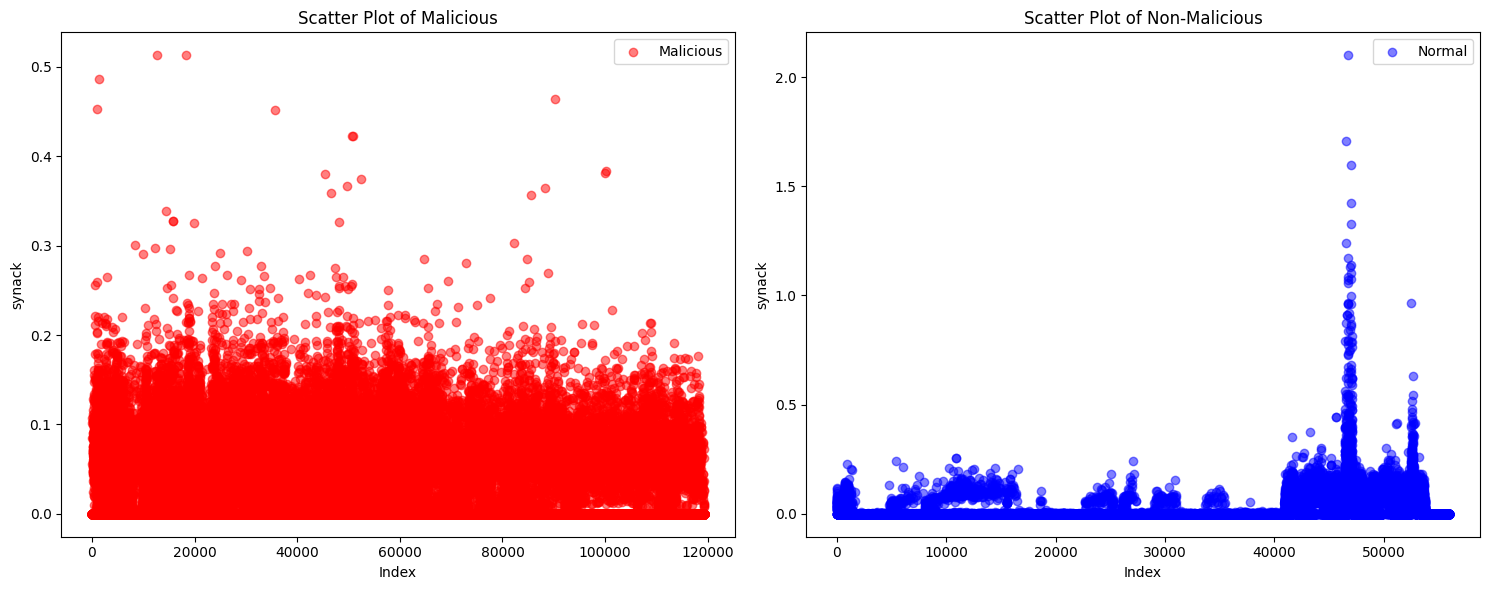

In [41]:
col = 'synack'
show_scatter_plot(df,col)#ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',

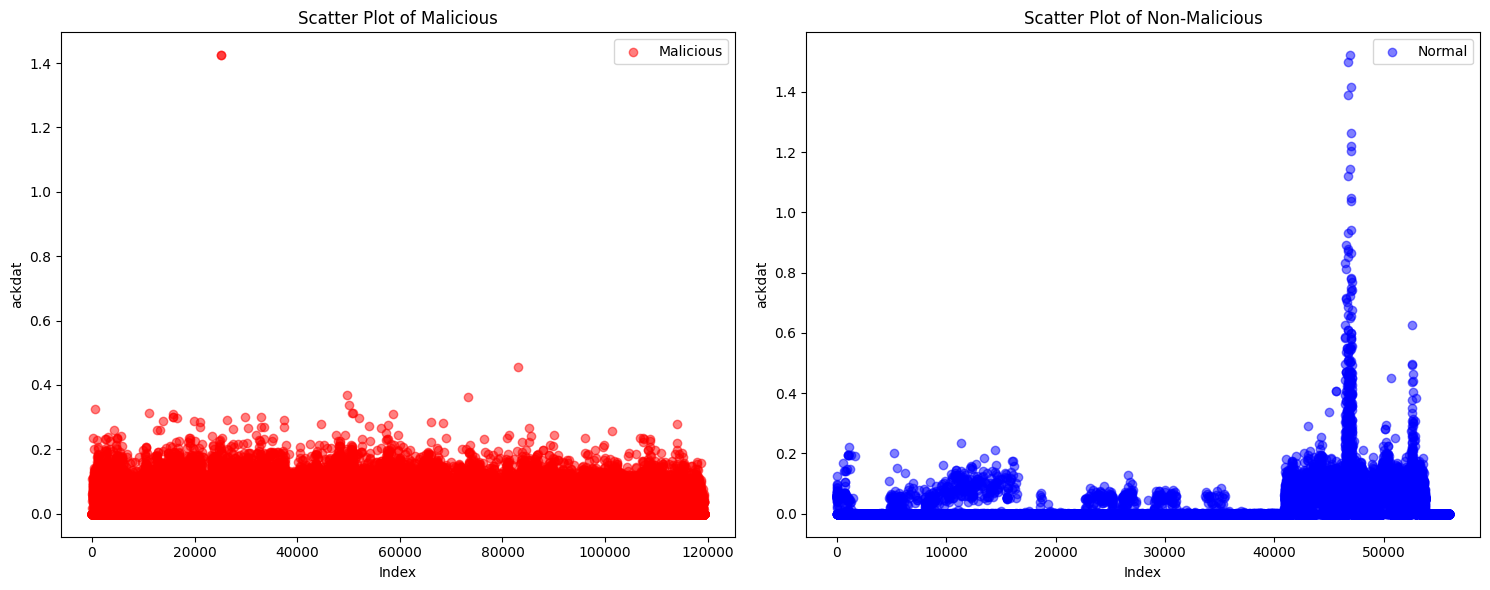

In [42]:
col = 'ackdat'
show_scatter_plot(df,col)#smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',

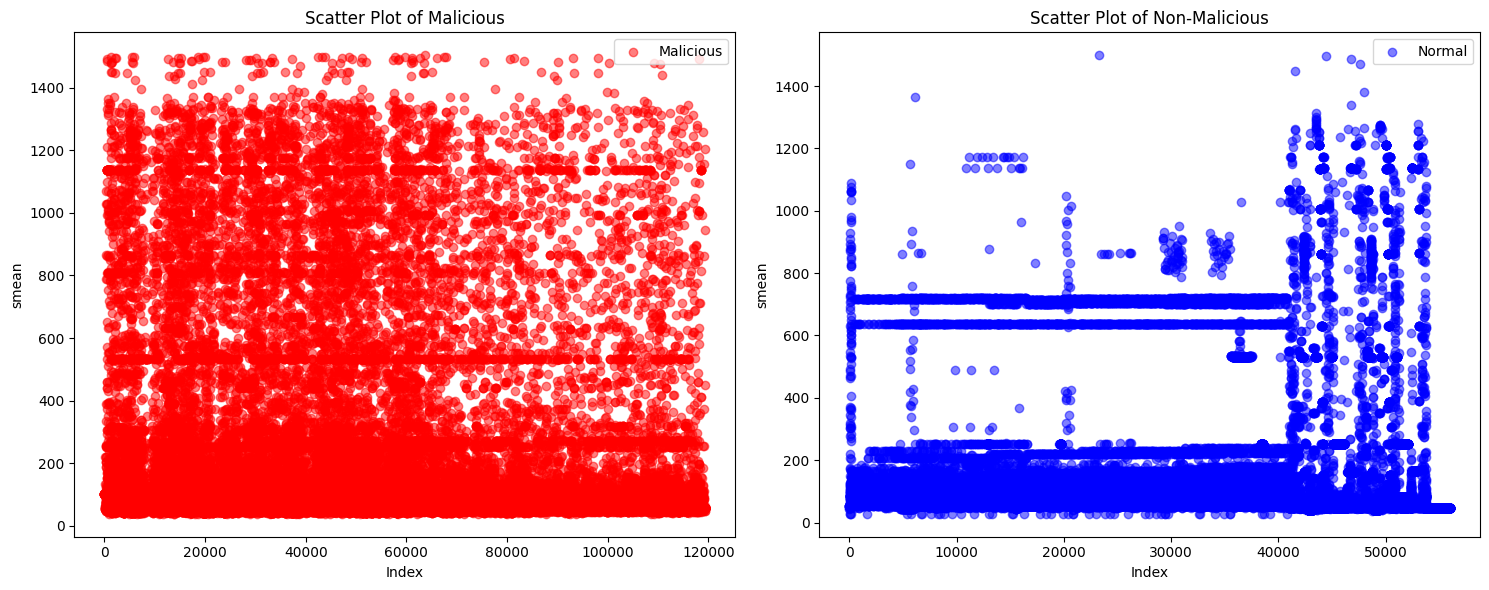

In [43]:
col = 'smean'
show_scatter_plot(df,col)#'dmean', 'trans_depth', 'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',

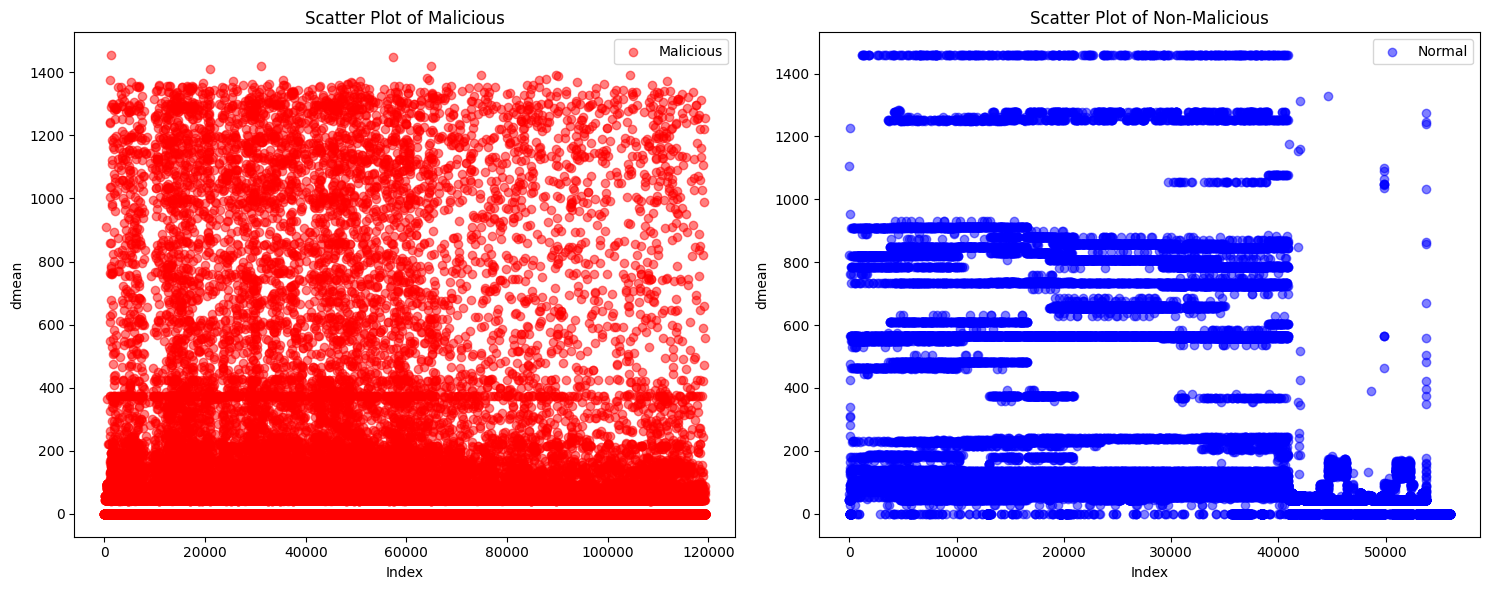

In [44]:
col = 'dmean'
show_scatter_plot(df,col)#'', 'trans_depth', 'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',

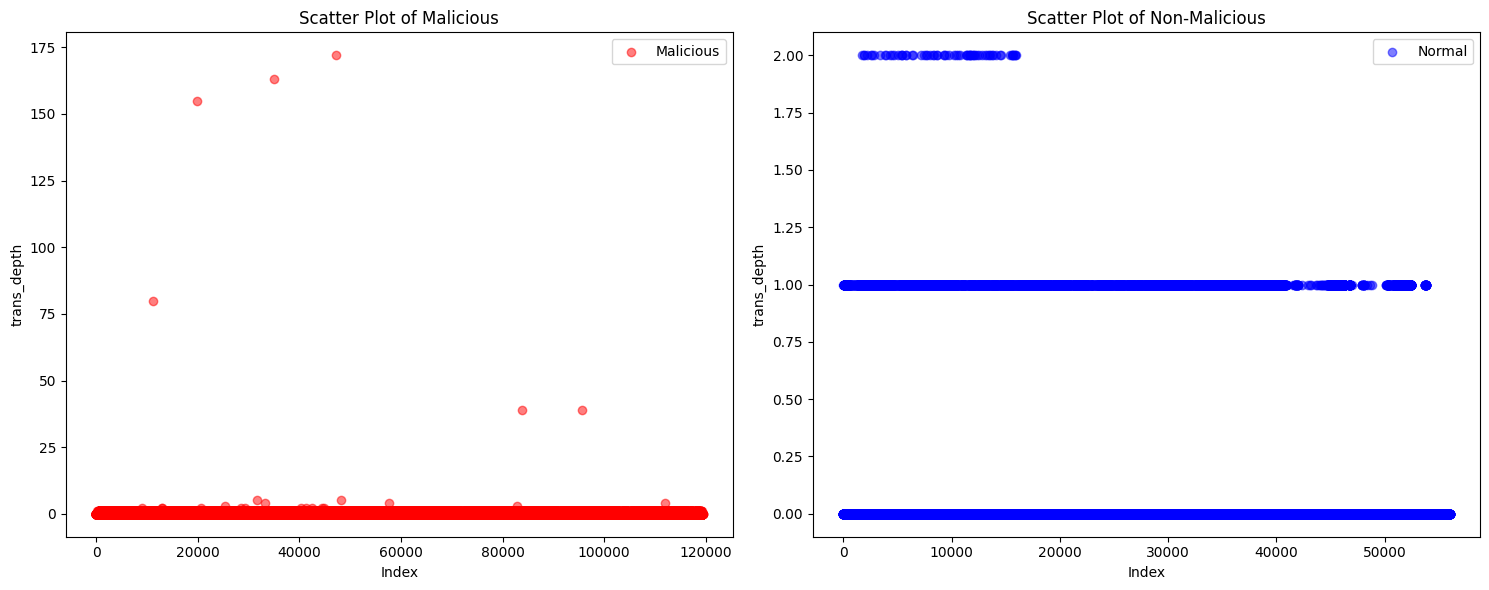

In [45]:
col = 'trans_depth'
show_scatter_plot(df,col)#'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',

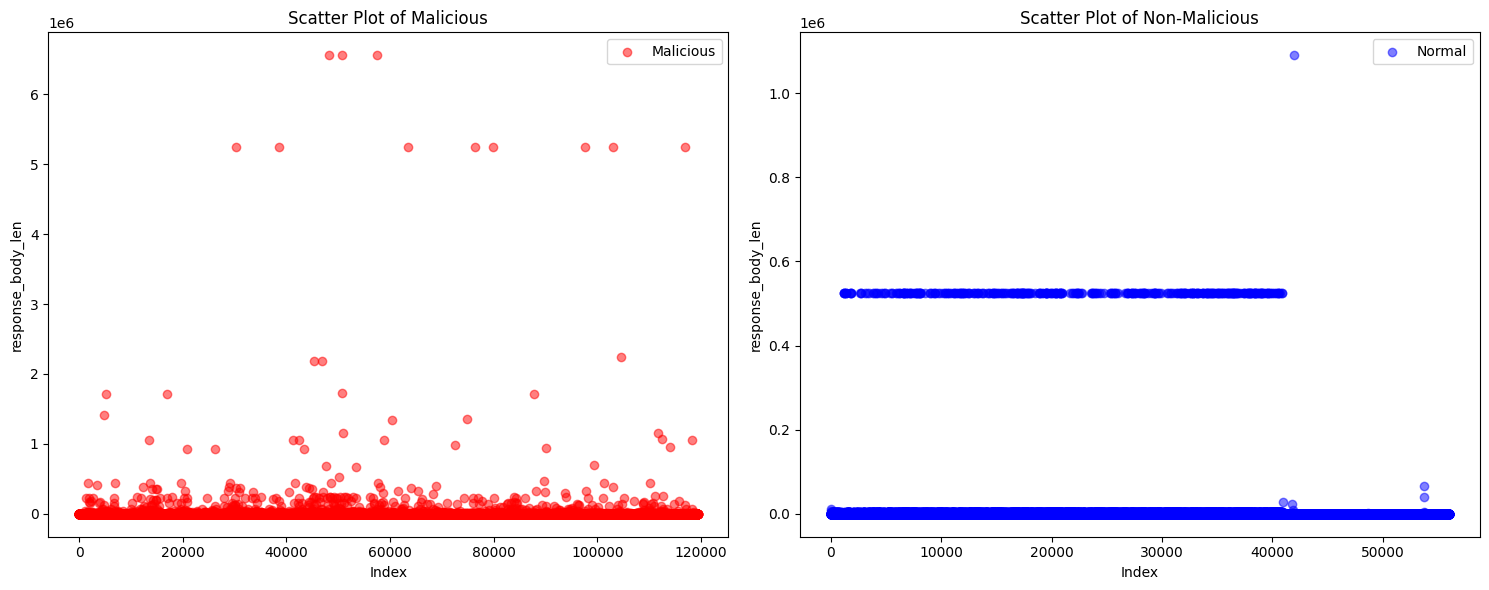

In [46]:
col = 'response_body_len'
show_scatter_plot(df,col)#'', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',

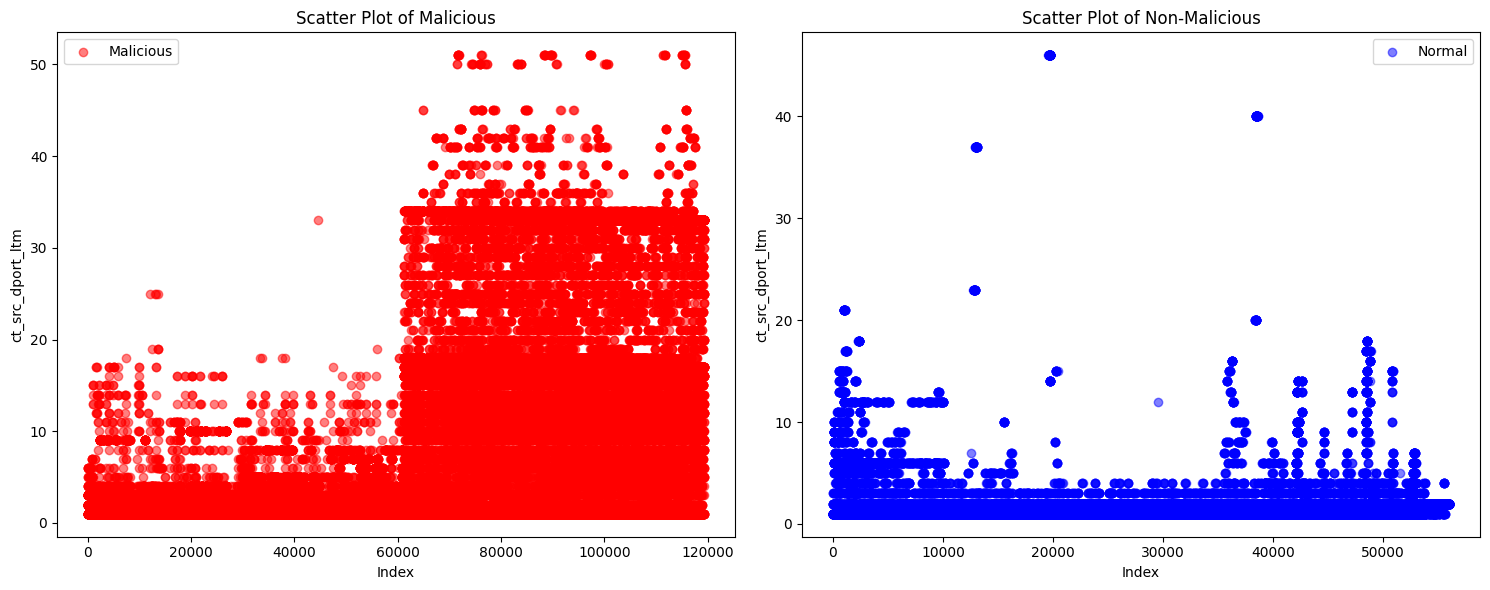

In [47]:
col = 'ct_src_dport_ltm'
show_scatter_plot(df,col)#'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',

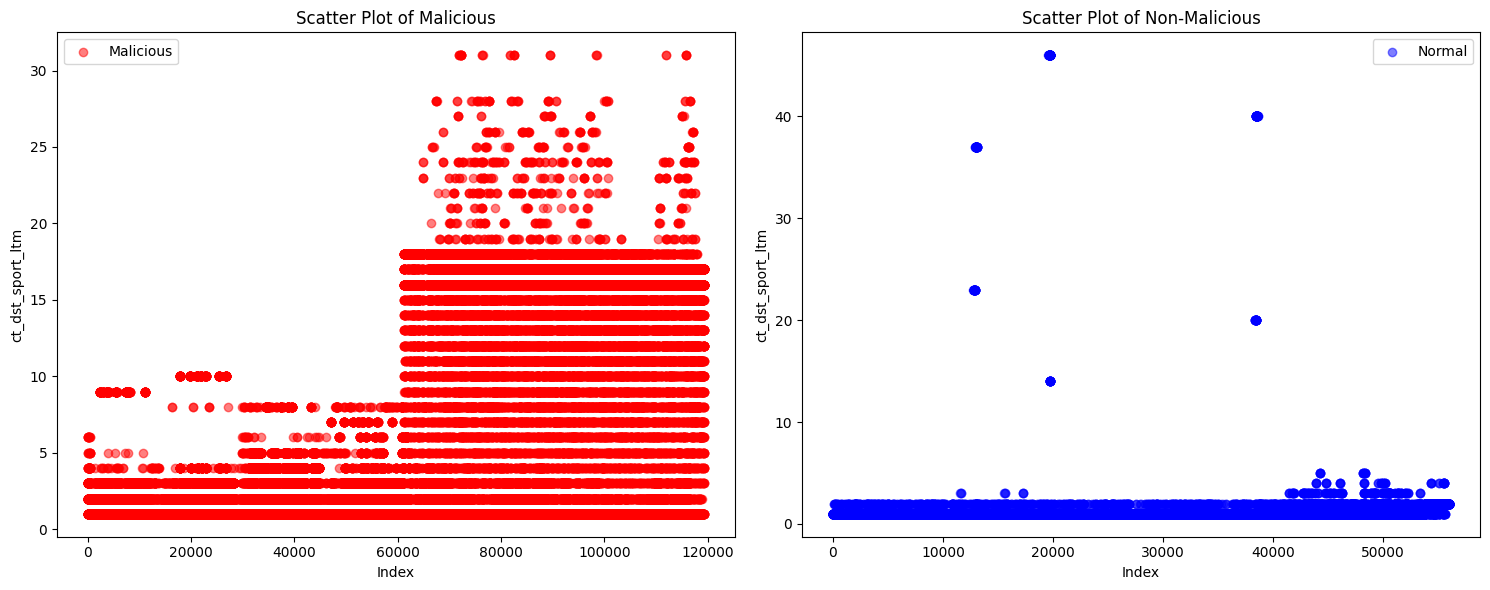

In [48]:
col = 'ct_dst_sport_ltm'
show_scatter_plot(df,col)#'', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',

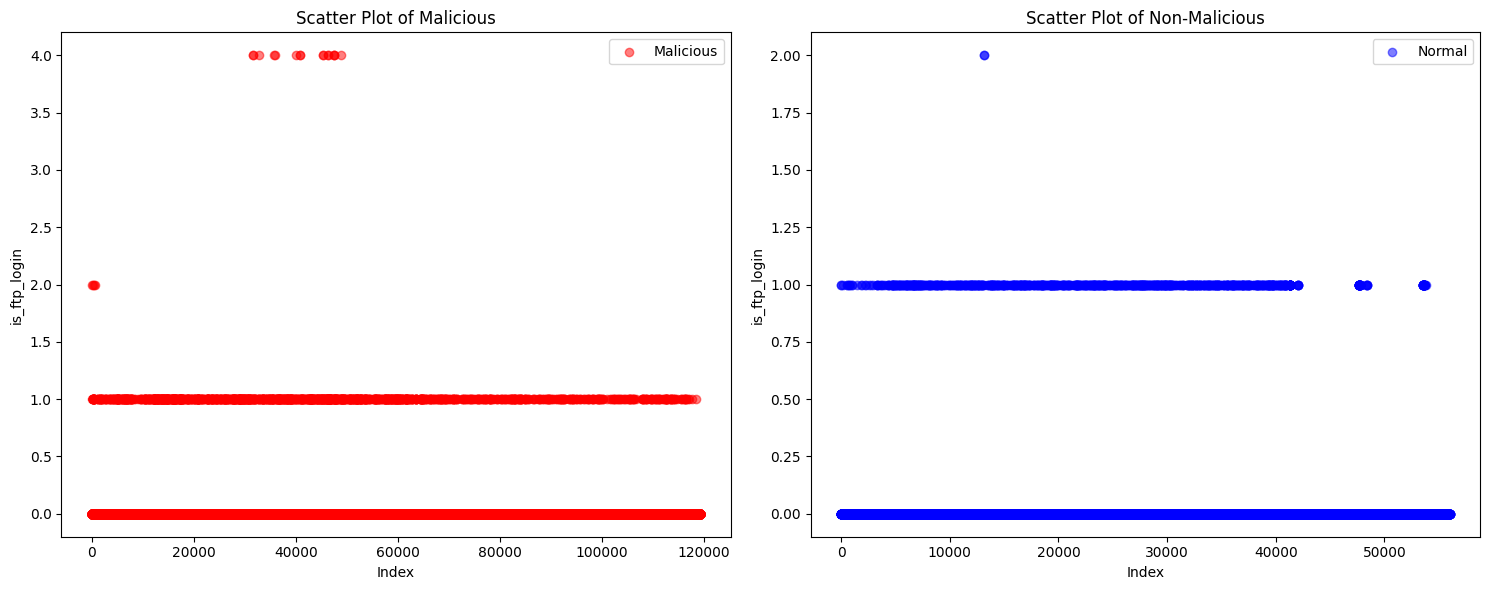

In [49]:
col = 'is_ftp_login'
show_scatter_plot(df,col)#'', '', 'ct_ftp_cmd', 'ct_flw_http_mthd',

In [50]:
df.loc[df[col] > 1 , col] = 1

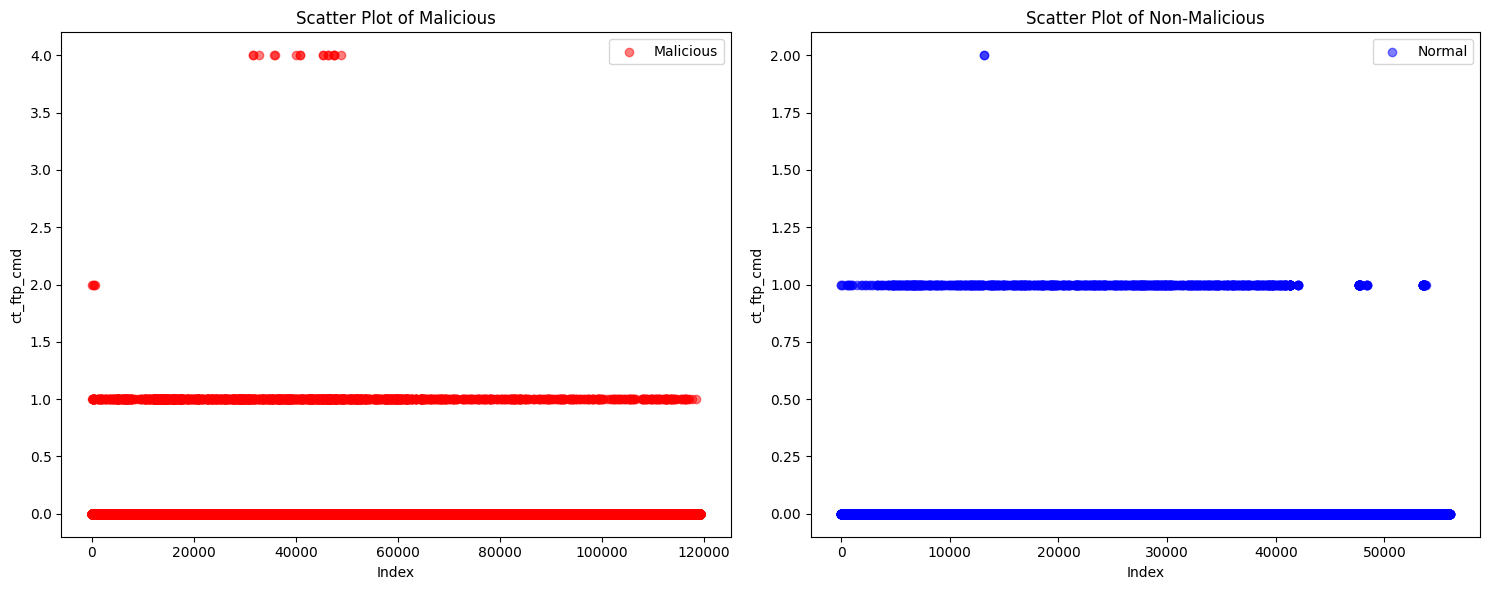

In [51]:
col = 'ct_ftp_cmd'
show_scatter_plot(df,col)#'ct_flw_http_mthd',

In [52]:
df.loc[df[col] > 1 , col] = 1

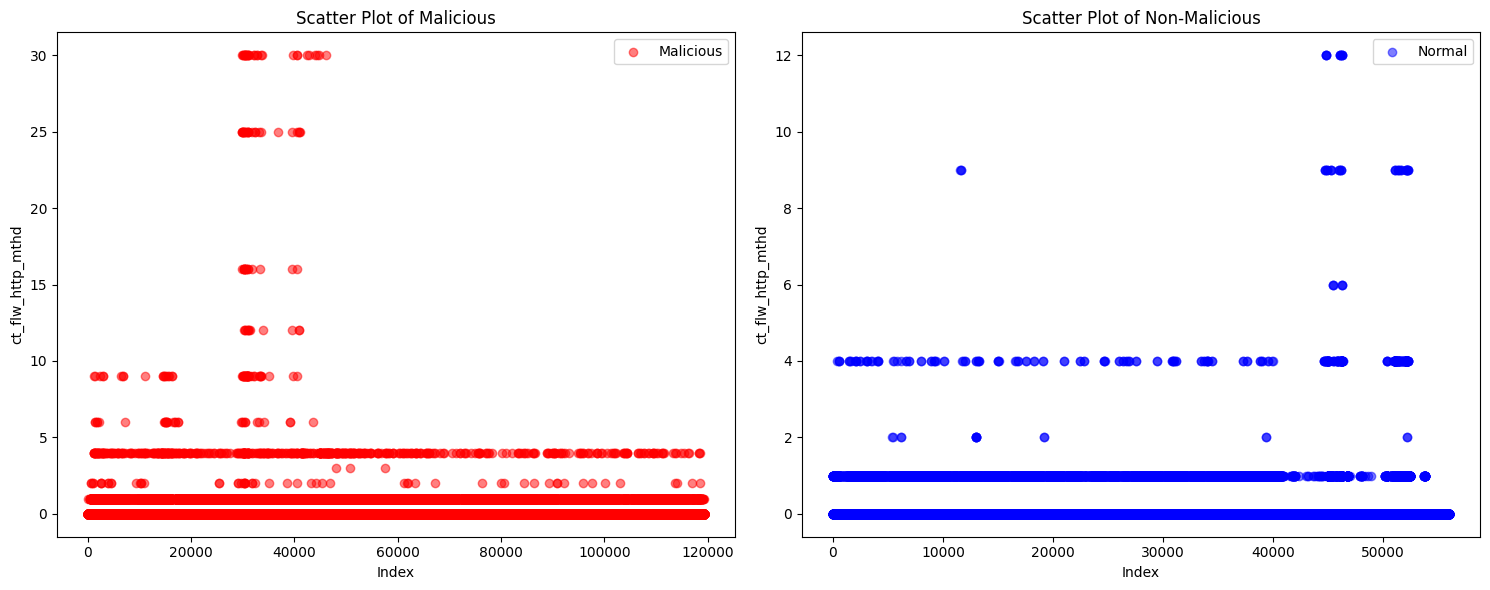

In [53]:
col = 'ct_flw_http_mthd'
show_scatter_plot(df,col)

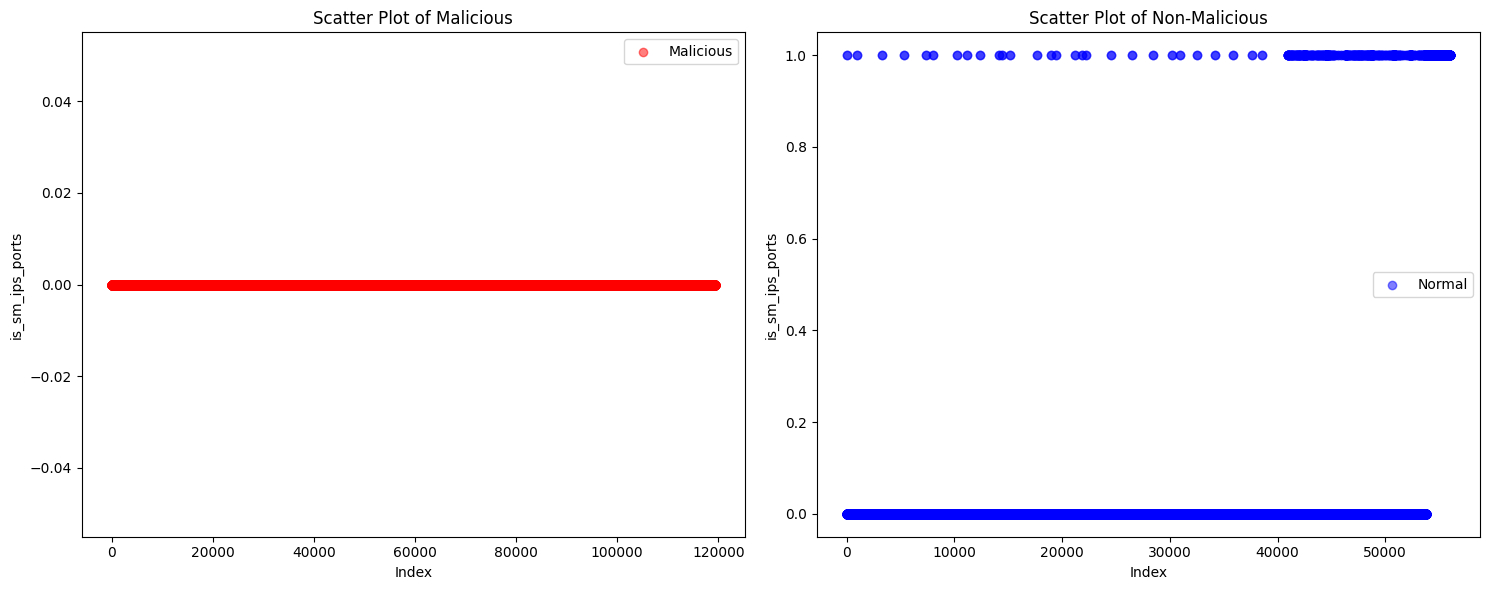

In [54]:
col = 'is_sm_ips_ports'
show_scatter_plot(df,col)#attack_cat'

In [55]:
#I think it is also a target variable.
col = 'attack_cat'
mal_df[col].value_counts()


attack_cat
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Normal                0
Name: count, dtype: int64

In [56]:
df = df.drop(col, axis=1)

In [57]:
col = 'proto'
proto_counts = mal_df[col].value_counts()
print(proto_counts.head(30))

proto
udp           49361
tcp           40825
unas          12084
ospf           2531
sctp           1150
any             300
gre             225
sun-nd          201
swipe           201
ipv6            201
mobile          201
pim             201
rsvp            200
sep             193
ib              101
qnx             100
pnni            100
pvp             100
ptp             100
pri-enc         100
rvd             100
sat-expak       100
3pc             100
pipe            100
pgm             100
nsfnet-igp      100
narp            100
mtp             100
micp            100
mhrp            100
Name: count, dtype: int64


In [58]:
col = 'proto'
proto_counts = normal_df[col].value_counts()
print(proto_counts.head(30))

proto
tcp           39121
udp           13922
arp            2859
ospf             64
igmp             18
icmp             15
rtp               1
pvp               0
qnx               0
rdp               0
rsvp              0
rvd               0
ptp               0
sat-expak         0
sat-mon           0
sccopmce          0
scps              0
sctp              0
pup               0
3pc               0
prm               0
sdrp              0
pnni              0
pipe              0
pim               0
pgm               0
nvp               0
nsfnet-igp        0
netblt            0
narp              0
Name: count, dtype: int64


In [59]:
col = 'proto'
proto_counts = df[col].value_counts()
print(proto_counts.head(20))

proto
tcp        79946
udp        63283
unas       12084
arp         2859
ospf        2595
sctp        1150
any          300
gre          225
sun-nd       201
swipe        201
pim          201
mobile       201
ipv6         201
rsvp         200
sep          193
ib           101
pri-enc      100
qnx          100
rvd          100
pvp          100
Name: count, dtype: int64


In [60]:
valid_protos = ['tcp', 'udp', 'arp', 'ospf', 'igmp', 'icmp', 'rtp']
df[col] = df[col].apply(lambda x: x if x in valid_protos else 'm')

valid_protos = ['igmp', 'icmp', 'rtp']
df[col] = df[col].apply(lambda x: x if x not in valid_protos else 'n')

In [61]:
col = 'proto'
proto_counts = df[col].value_counts()
print(proto_counts)

proto
tcp     79946
udp     63283
m       26624
arp      2859
ospf     2595
n          34
Name: count, dtype: int64


In [62]:
df = pd.get_dummies(df, columns=['proto'], prefix='proto', drop_first=False)

In [63]:
col = 'service'
proto_counts = mal_df[col].value_counts()
print(proto_counts)

service
-           57656
dns         39801
http        13376
smtp         3479
ftp          2210
ftp-data     1443
pop3         1101
dhcp           94
snmp           79
ssl            56
irc            25
ssh            11
radius         10
Name: count, dtype: int64


In [64]:
col = 'service'
proto_counts = normal_df[col].value_counts()
print(proto_counts)

service
-           36512
dns          7493
http         5348
ftp-data     2552
smtp         1579
ssh          1291
ftp          1218
pop3            4
radius          2
snmp            1
dhcp            0
irc             0
ssl             0
Name: count, dtype: int64


In [65]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
col = 'service'
df[col] = label_encoder.fit_transform(df[col])

In [66]:
col = 'state'
proto_counts = mal_df[col].value_counts()
print(proto_counts.head(20))

state
INT    76560
FIN    40650
REQ     1066
CON     1053
RST       12
ECO        0
PAR        0
URN        0
no         0
Name: count, dtype: int64


In [67]:
proto_counts = normal_df[col].value_counts()
print(proto_counts.head(20))

state
FIN    37175
CON    12099
INT     5715
REQ      925
RST       71
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64


In [68]:
proto_counts = df[col].value_counts()
print(proto_counts.head(20))

state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64


In [69]:
temp = ['RST', 'ECO', 'PAR', 'URN', 'no']
df[col] = df[col].apply(lambda x: x if x not in temp else 'm')

In [70]:
proto_counts = df[col].value_counts()
print(proto_counts.head(20))

state
INT    82275
FIN    77825
CON    13152
REQ     1991
m         98
Name: count, dtype: int64


In [71]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


df[col] = label_encoder.fit_transform(df[col])

In [72]:
df = df.replace({True: 0, False: 1})

In [73]:
df['tcprtt'].head()

0    0.000000
1    0.000000
2    0.111897
3    0.000000
4    0.128381
Name: tcprtt, dtype: float32

In [100]:
X = df.drop('label', axis=1)
y = df['label']

In [101]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(X)
dropable_cols=X.columns[[not col for col in var_thres.get_support()]]

In [102]:
X=X.drop(dropable_cols,axis=1)


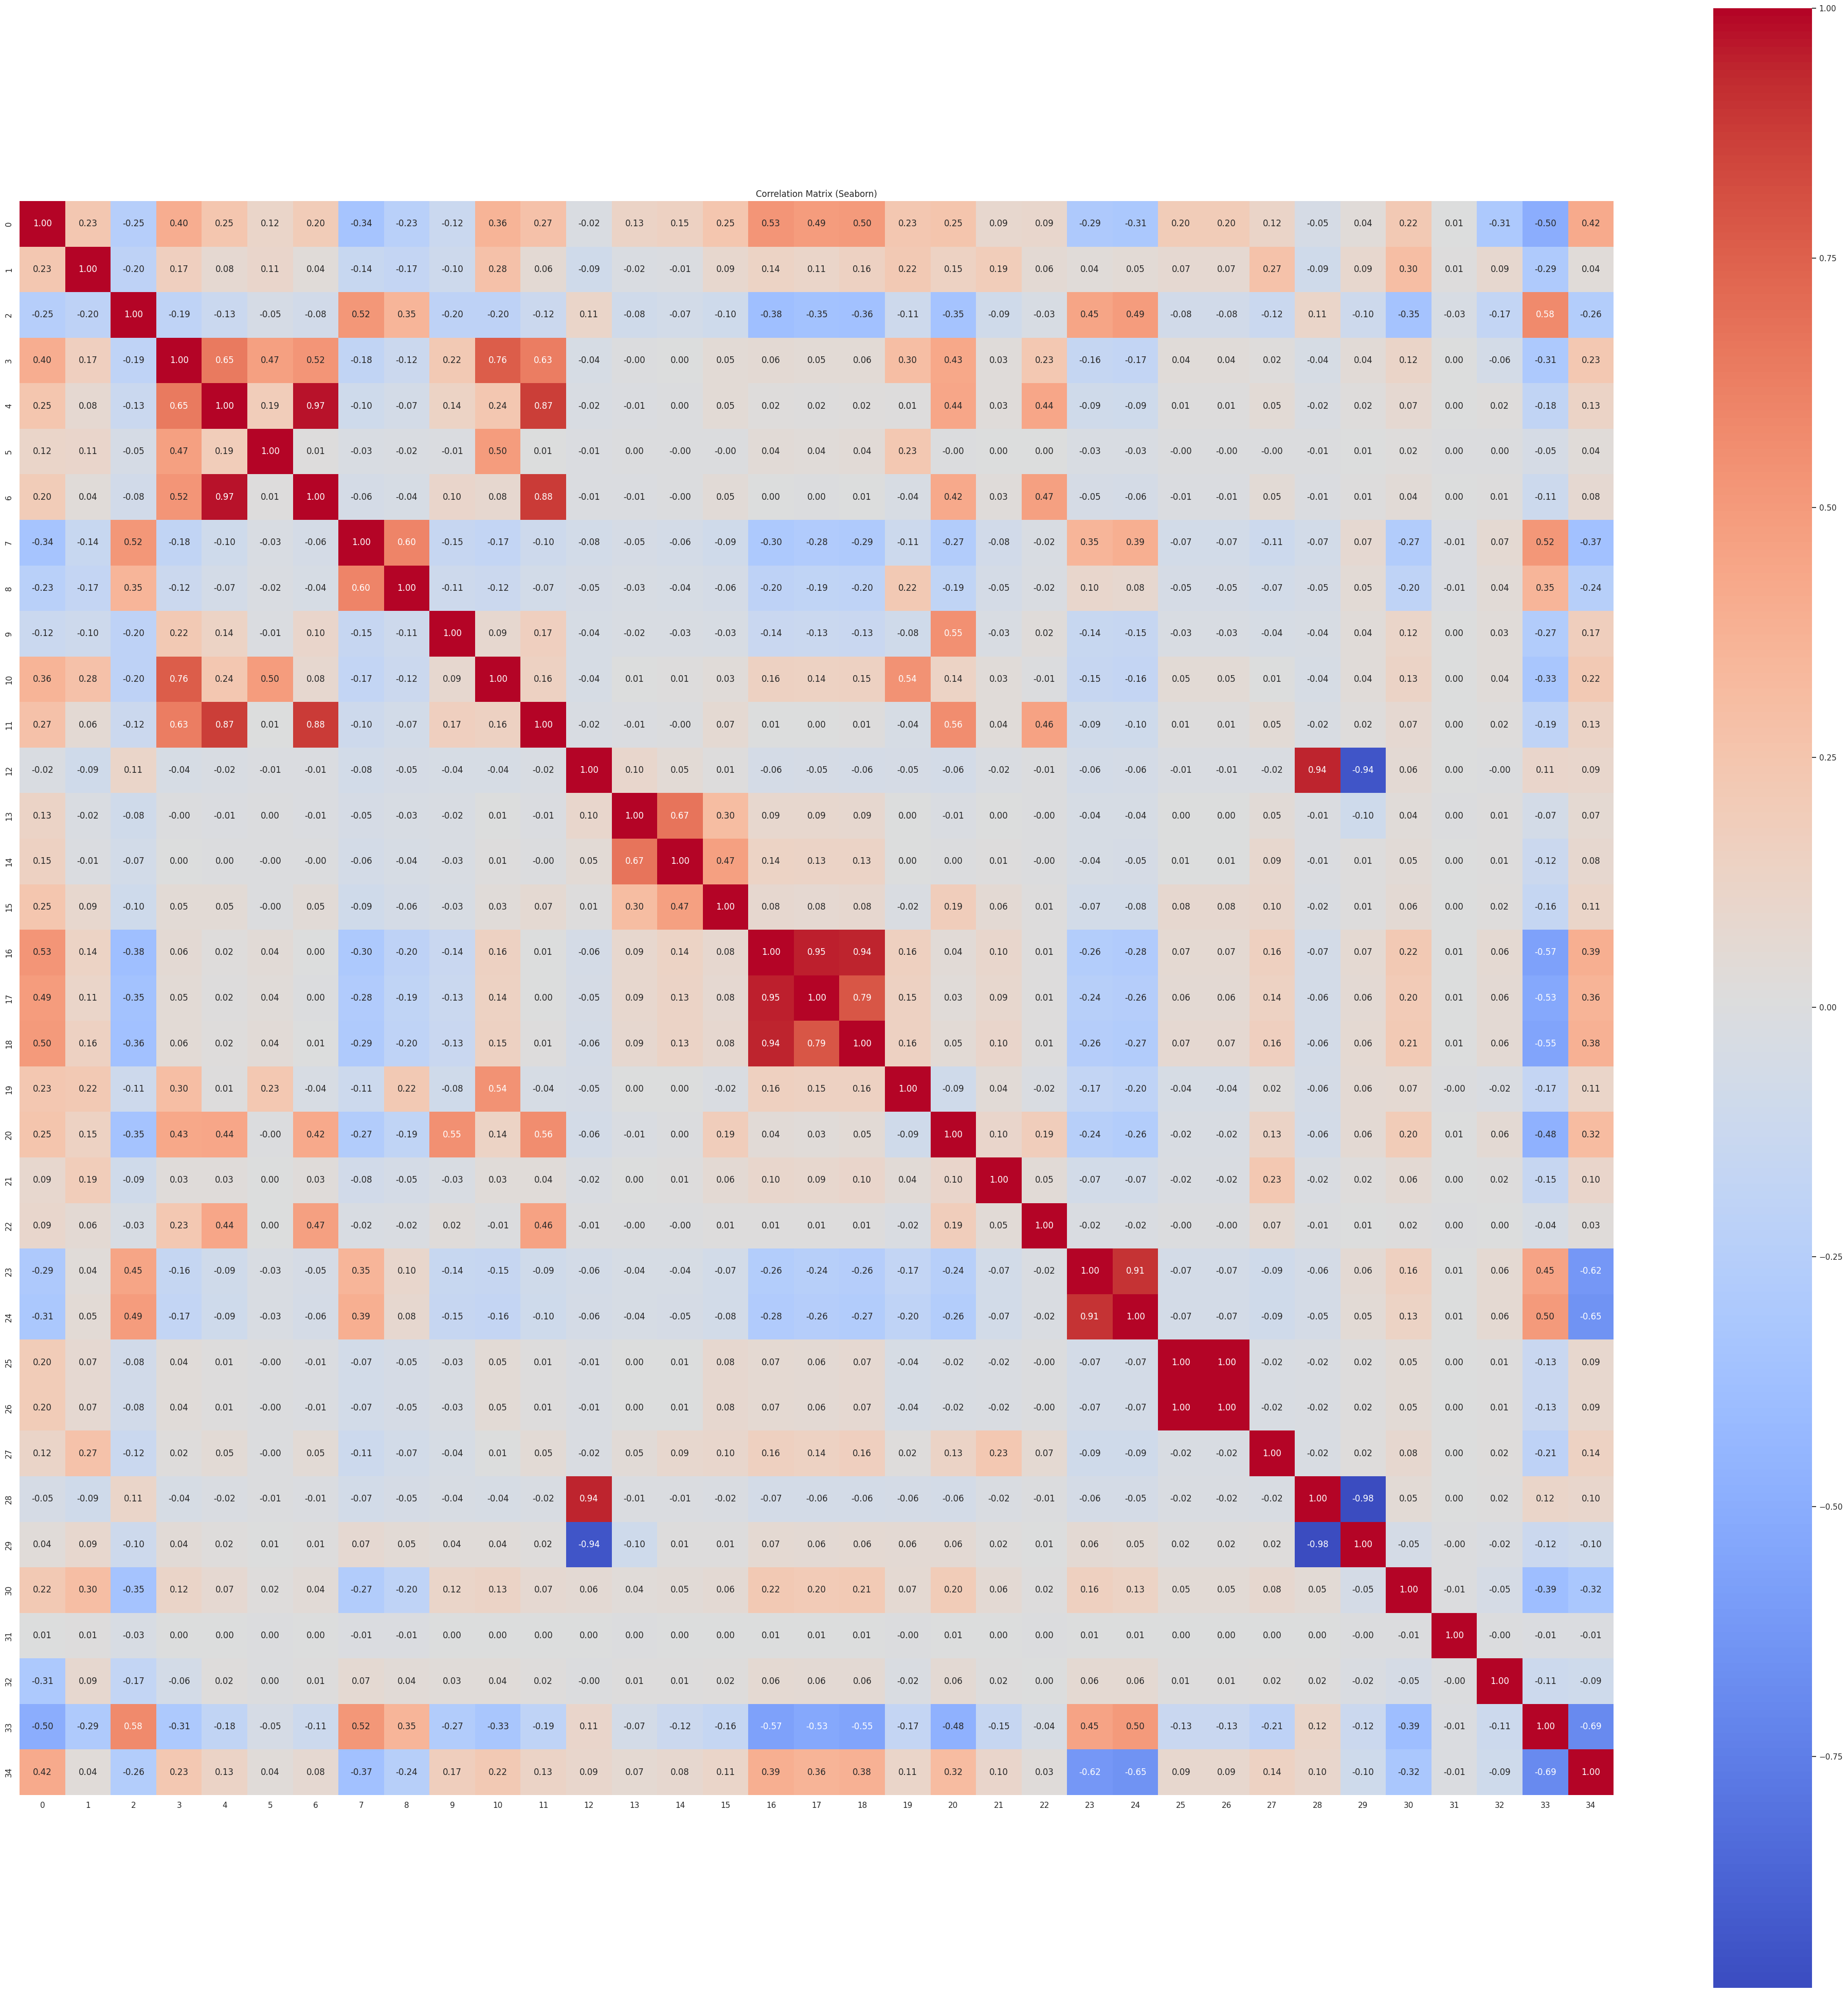

In [104]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(X, rowvar=False)

# Create a Seaborn heatmap
sns.set(style="white")  # Set the style of the plot
plt.figure(figsize=(50, 50))  # Set the size of the plot

# Generate a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)

# Display the plot
plt.title("Correlation Matrix (Seaborn)")
plt.show()

In [105]:
import numpy as np

def get_correlated_features(correlation_matrix, threshold=0.8):
    num_features = correlation_matrix.shape[0]
    correlated_features = set()

    for i in range(num_features):
        for j in range(i + 1, num_features):
            correlation = correlation_matrix[i, j]
            if correlation >= threshold:
                correlated_features.add((i,j))

    return correlated_features

correlated_features = [X.columns[x[0]] for x in get_correlated_features(correlation_matrix,0.95) ]
correlated_features


['dpkts', 'is_ftp_login']

In [106]:
X=X.drop(correlated_features,axis=1)

In [107]:
from sklearn.feature_selection import  mutual_info_classif
mutual_info = mutual_info_classif(X,y)

In [108]:
mutual_data = pd.Series(mutual_info,index=X.columns)*100
mutual_data.sort_values(ascending = False)

sbytes               46.683343
dbytes               37.303137
rate                 35.355580
sload                34.723625
smean                33.546846
dur                  33.081296
dmean                31.465790
dinpkt               29.784732
dload                28.028033
sinpkt               24.682760
tcprtt               23.668913
synack               23.580539
ackdat               23.246899
sjit                 20.807611
state                18.646615
djit                 17.772090
spkts                17.720362
dloss                14.582363
ct_dst_sport_ltm     13.611699
sloss                11.936331
ct_src_dport_ltm      8.989509
proto_m               8.473919
proto_tcp             7.829362
service               4.253654
proto_ospf            3.635097
proto_arp             3.539416
response_body_len     3.487898
proto_udp             3.288267
proto_n               2.768367
is_sm_ips_ports       1.637110
ct_ftp_cmd            0.169090
ct_flw_http_mthd      0.129035
trans_de

In [120]:
X=X.drop(mutual_data[mutual_data<0.1].index.tolist(),axis=1) 

KeyError: "['trans_depth'] not found in axis"

In [121]:
len(X.columns)

32

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [123]:
for col in X.columns:
    standardization(X,col)

    # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
# # Initialize the SVM classifier
# svm_classifier = SVC()

In [125]:

# # Train the SVM classifier on the training data
# history = svm_classifier.fit(X_train, y_train)

In [126]:
# # Make predictions on the test set
# y_pred = svm_classifier.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")


In [127]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
history1 = rf_classifier.fit(X_train, y_train)



In [128]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 95.13%


In [129]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     11169
           1       0.95      0.97      0.96     23900

    accuracy                           0.95     35069
   macro avg       0.95      0.94      0.94     35069
weighted avg       0.95      0.95      0.95     35069



In [ ]:
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# svm_classifier = SVC(probability=True, random_state=42)

# # Create a VotingClassifier with soft voting
# # Assign higher weight to RandomForestClassifier
# voting_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('svm', svm_classifier)], voting='soft', weights=[2, 1])

# # Train the VotingClassifier on the training data
# voting_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = voting_classifier.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")
